In [10]:
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Algorithm for constructing the Graph

In [11]:
#Returns the Graph (Undirected)

def make_graph(file_name):
    path = "dataset_module_2/" + file_name
    data = pd.read_csv(path) 
    counter=len(data)
    nodes={}
    for i in range(counter):
        nodes[i]=data['username'][i]
    #print(nodes)
    mentions={}
    j=counter

    k=counter
    for i in range(counter):
        res = ast.literal_eval(data['mentions'][i])
        for j in range(len(res)):
            if(len(res[j])>0):
                nodes[k]=res[j]
                k+=1
    unique_users=set(nodes.values())
    user_ind={}
    j=0
    for i in unique_users:
        user_ind[i]=j
        j+=1
    #user_ind  

    ind_to_user={}
    for key in user_ind:
        ind_to_user[user_ind[key]]=key

    arr=np.zeros([len(unique_users),len(unique_users)],dtype=int)
    for i in range(counter):
        user=data['username'][i]
        res = ast.literal_eval(data['mentions'][i])
        for j in res:
            #print(user,"men",j)
            arr[user_ind[user]][[user_ind[j]]]+=1
    val =0
    for i in range (len(unique_users)):
        for j in range (len(unique_users)):
            val = max(val,arr[i][j])

    Graph=nx.Graph()
    DiGraph = nx.DiGraph();
    for i in range(0,len(unique_users)):
        for j in range(0,len(unique_users)):
            if(arr[i][j]>0):
                #print(i,j,arr[i][j])
                Graph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
                DiGraph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
            else:
                if(Graph.has_node(i)==0):
                    Graph.add_node(ind_to_user[i])
                if(Graph.has_node(j)==0):
                    Graph.add_node(ind_to_user[j])


    #nx.spring_layout(Graph)
    plt.figure(figsize=(50,50))
    nx.draw_networkx(Graph,node_size=300, node_color='red', with_labels=True)
    return Graph

In [12]:
# Returns the Graph (Directed)
def make_digraph(file_name):
    path = "dataset/" + file_name
    data = pd.read_csv(path) 
    counter=len(data)
    nodes={}
    for i in range(counter):
        nodes[i]=data['username'][i]
    #print(nodes)
    mentions={}
    j=counter

    k=counter
    for i in range(counter):
        res = ast.literal_eval(data['mentions'][i])
        for j in range(len(res)):
            if(len(res[j])>0):
                nodes[k]=res[j]
                k+=1
    unique_users=set(nodes.values())
    user_ind={}
    j=0
    for i in unique_users:
        user_ind[i]=j
        j+=1
    #user_ind  

    ind_to_user={}
    for key in user_ind:
        ind_to_user[user_ind[key]]=key

    arr=np.zeros([len(unique_users),len(unique_users)],dtype=int)
    for i in range(counter):
        user=data['username'][i]
        res = ast.literal_eval(data['mentions'][i])
        for j in res:
            #print(user,"men",j)
            arr[user_ind[user]][[user_ind[j]]]+=1
    val =0
    for i in range (len(unique_users)):
        for j in range (len(unique_users)):
            val = max(val,arr[i][j])

    Graph=nx.Graph()
    DiGraph = nx.DiGraph();
    for i in range(0,len(unique_users)):
        for j in range(0,len(unique_users)):
            if(arr[i][j]>0):
                #print(i,j,arr[i][j])
                Graph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
                DiGraph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
#             else:
#                 if(Graph.has_node(i)==0):
#                     Graph.add_node(ind_to_user[i])
#                 if(Graph.has_node(j)==0):
#                     Graph.add_node(ind_to_user[j])


    #nx.spring_layout(Graph)
    plt.figure(figsize=(50,50))
    #
    return DiGraph

# Drawing the Graph (Constructing the Graph for the major users and around the specific topics)

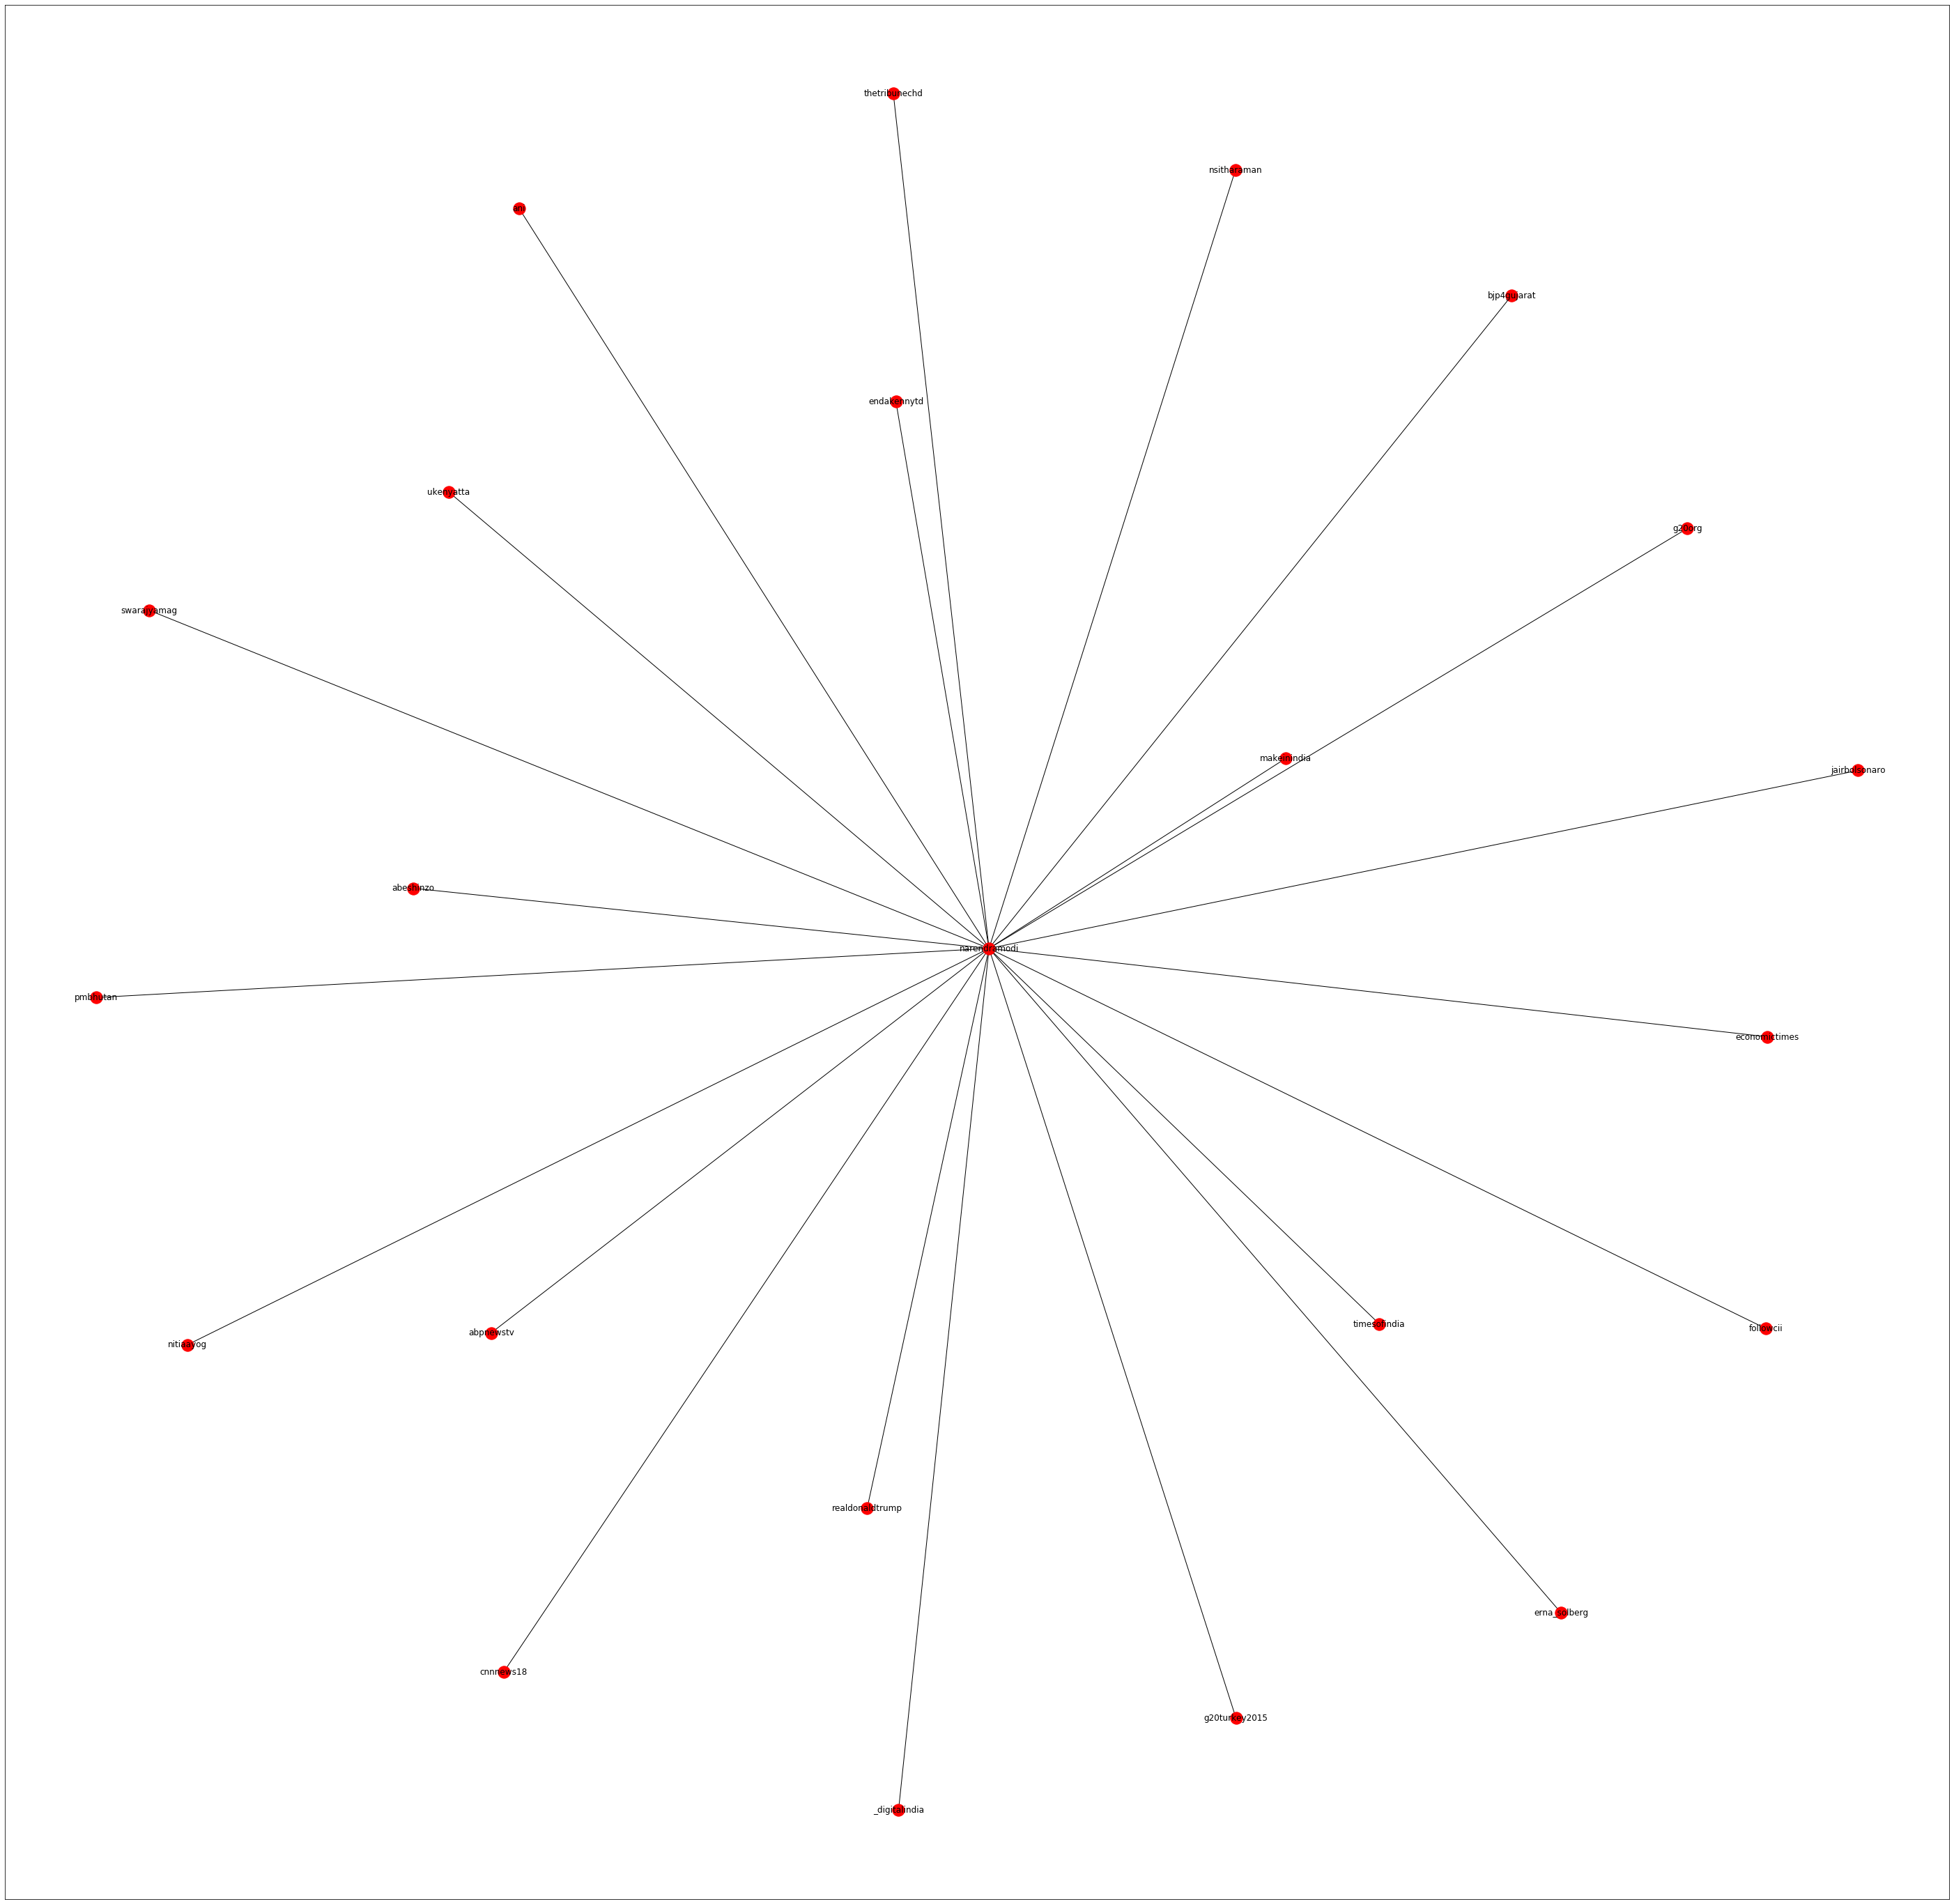

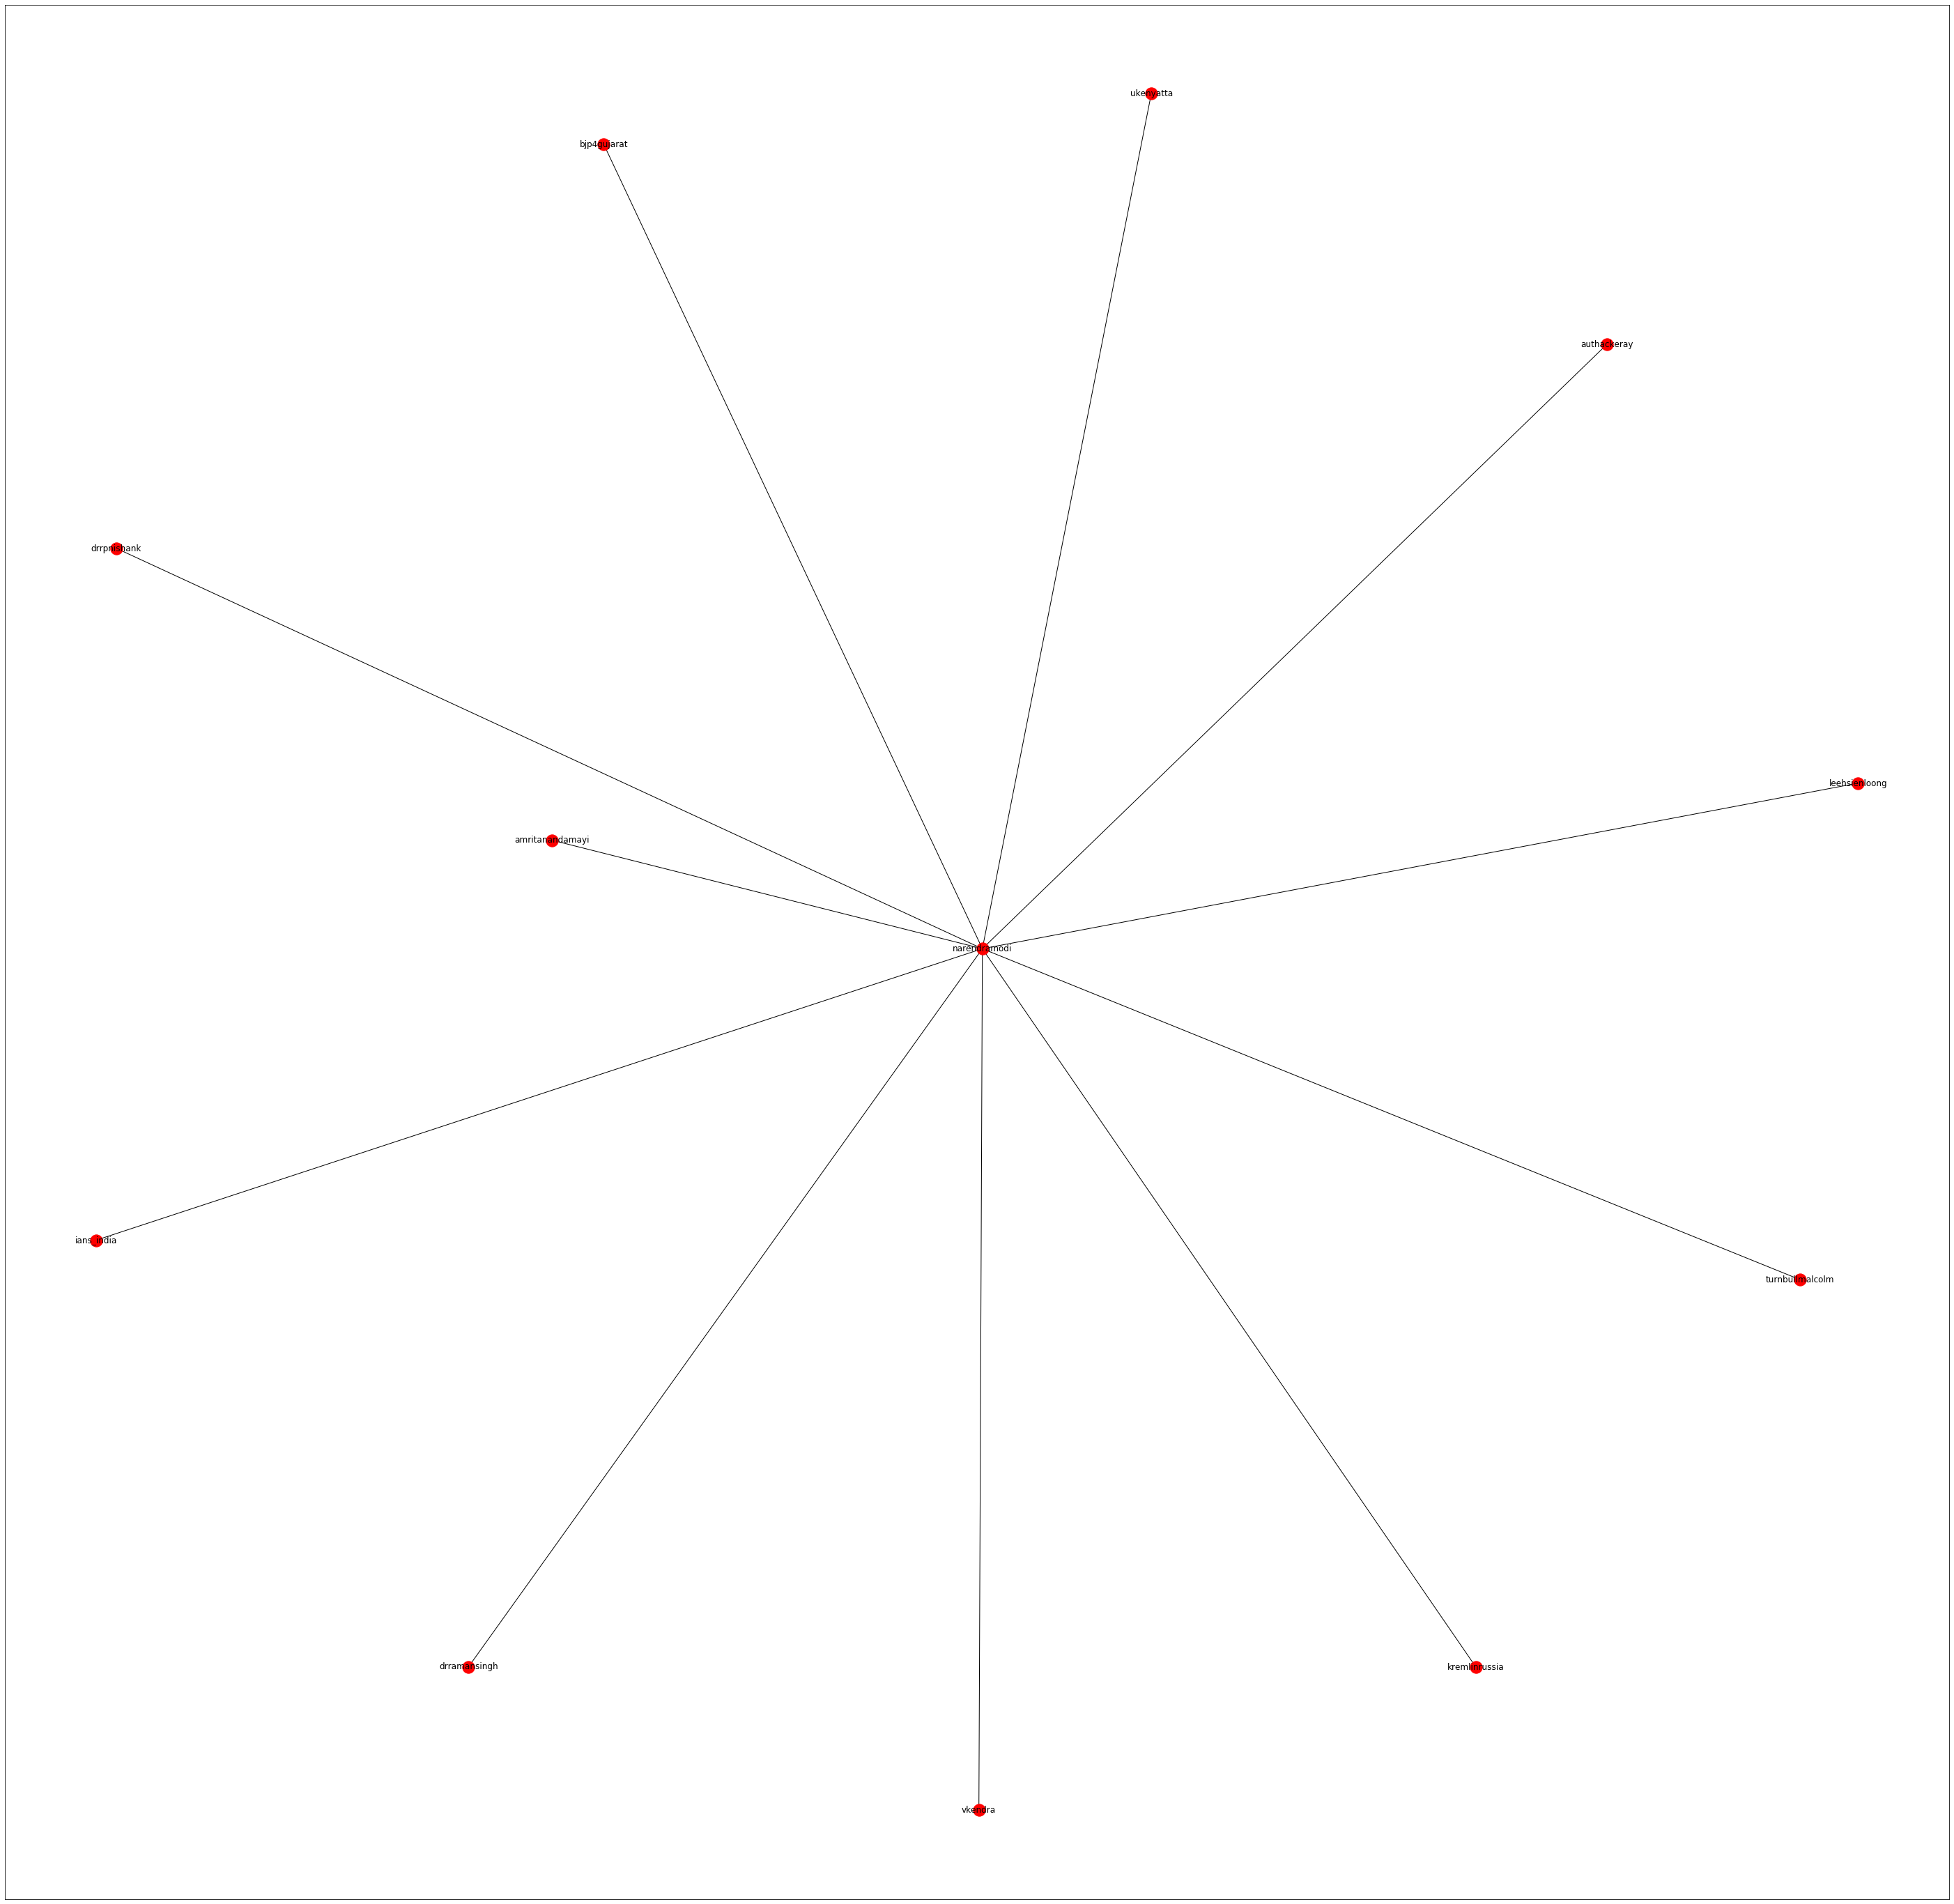

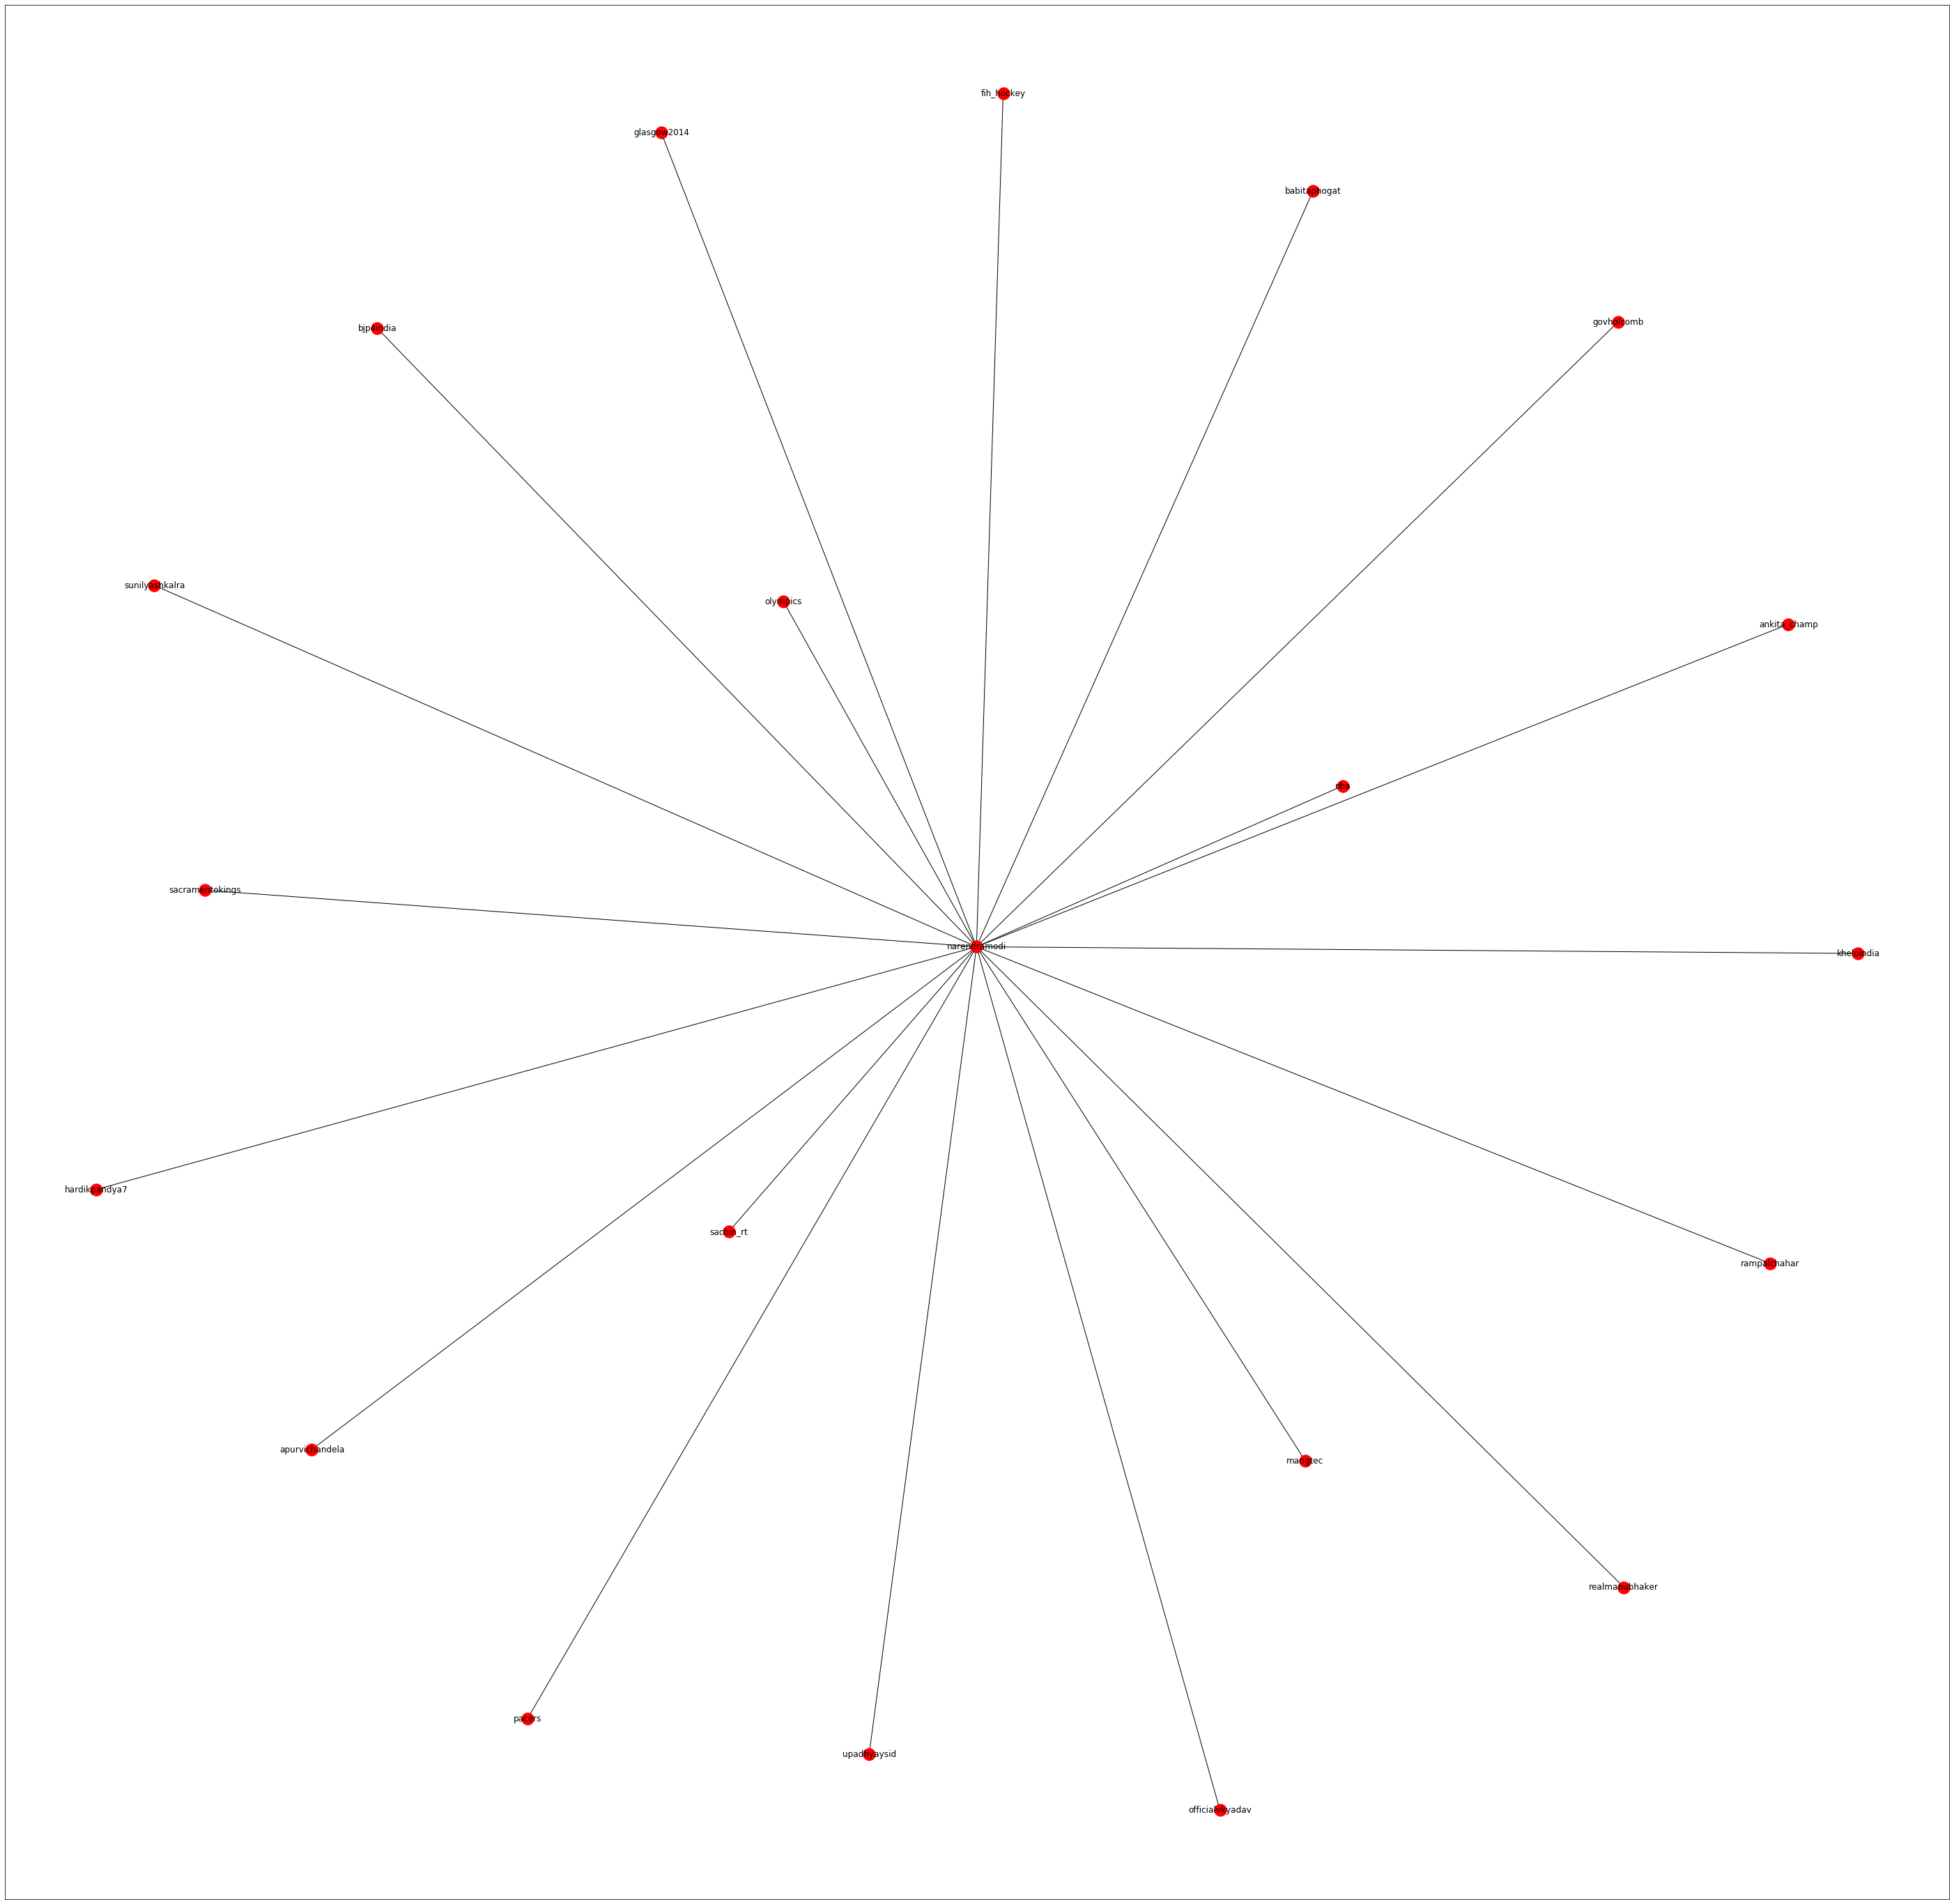

In [13]:
#Constructing the Graph for the major users and around the specific topics
modi_eco=make_graph("modi_economy.csv") 
modi_edu=make_graph("modi_education.csv")
modi_sprt=make_graph("modi_sports.csv")

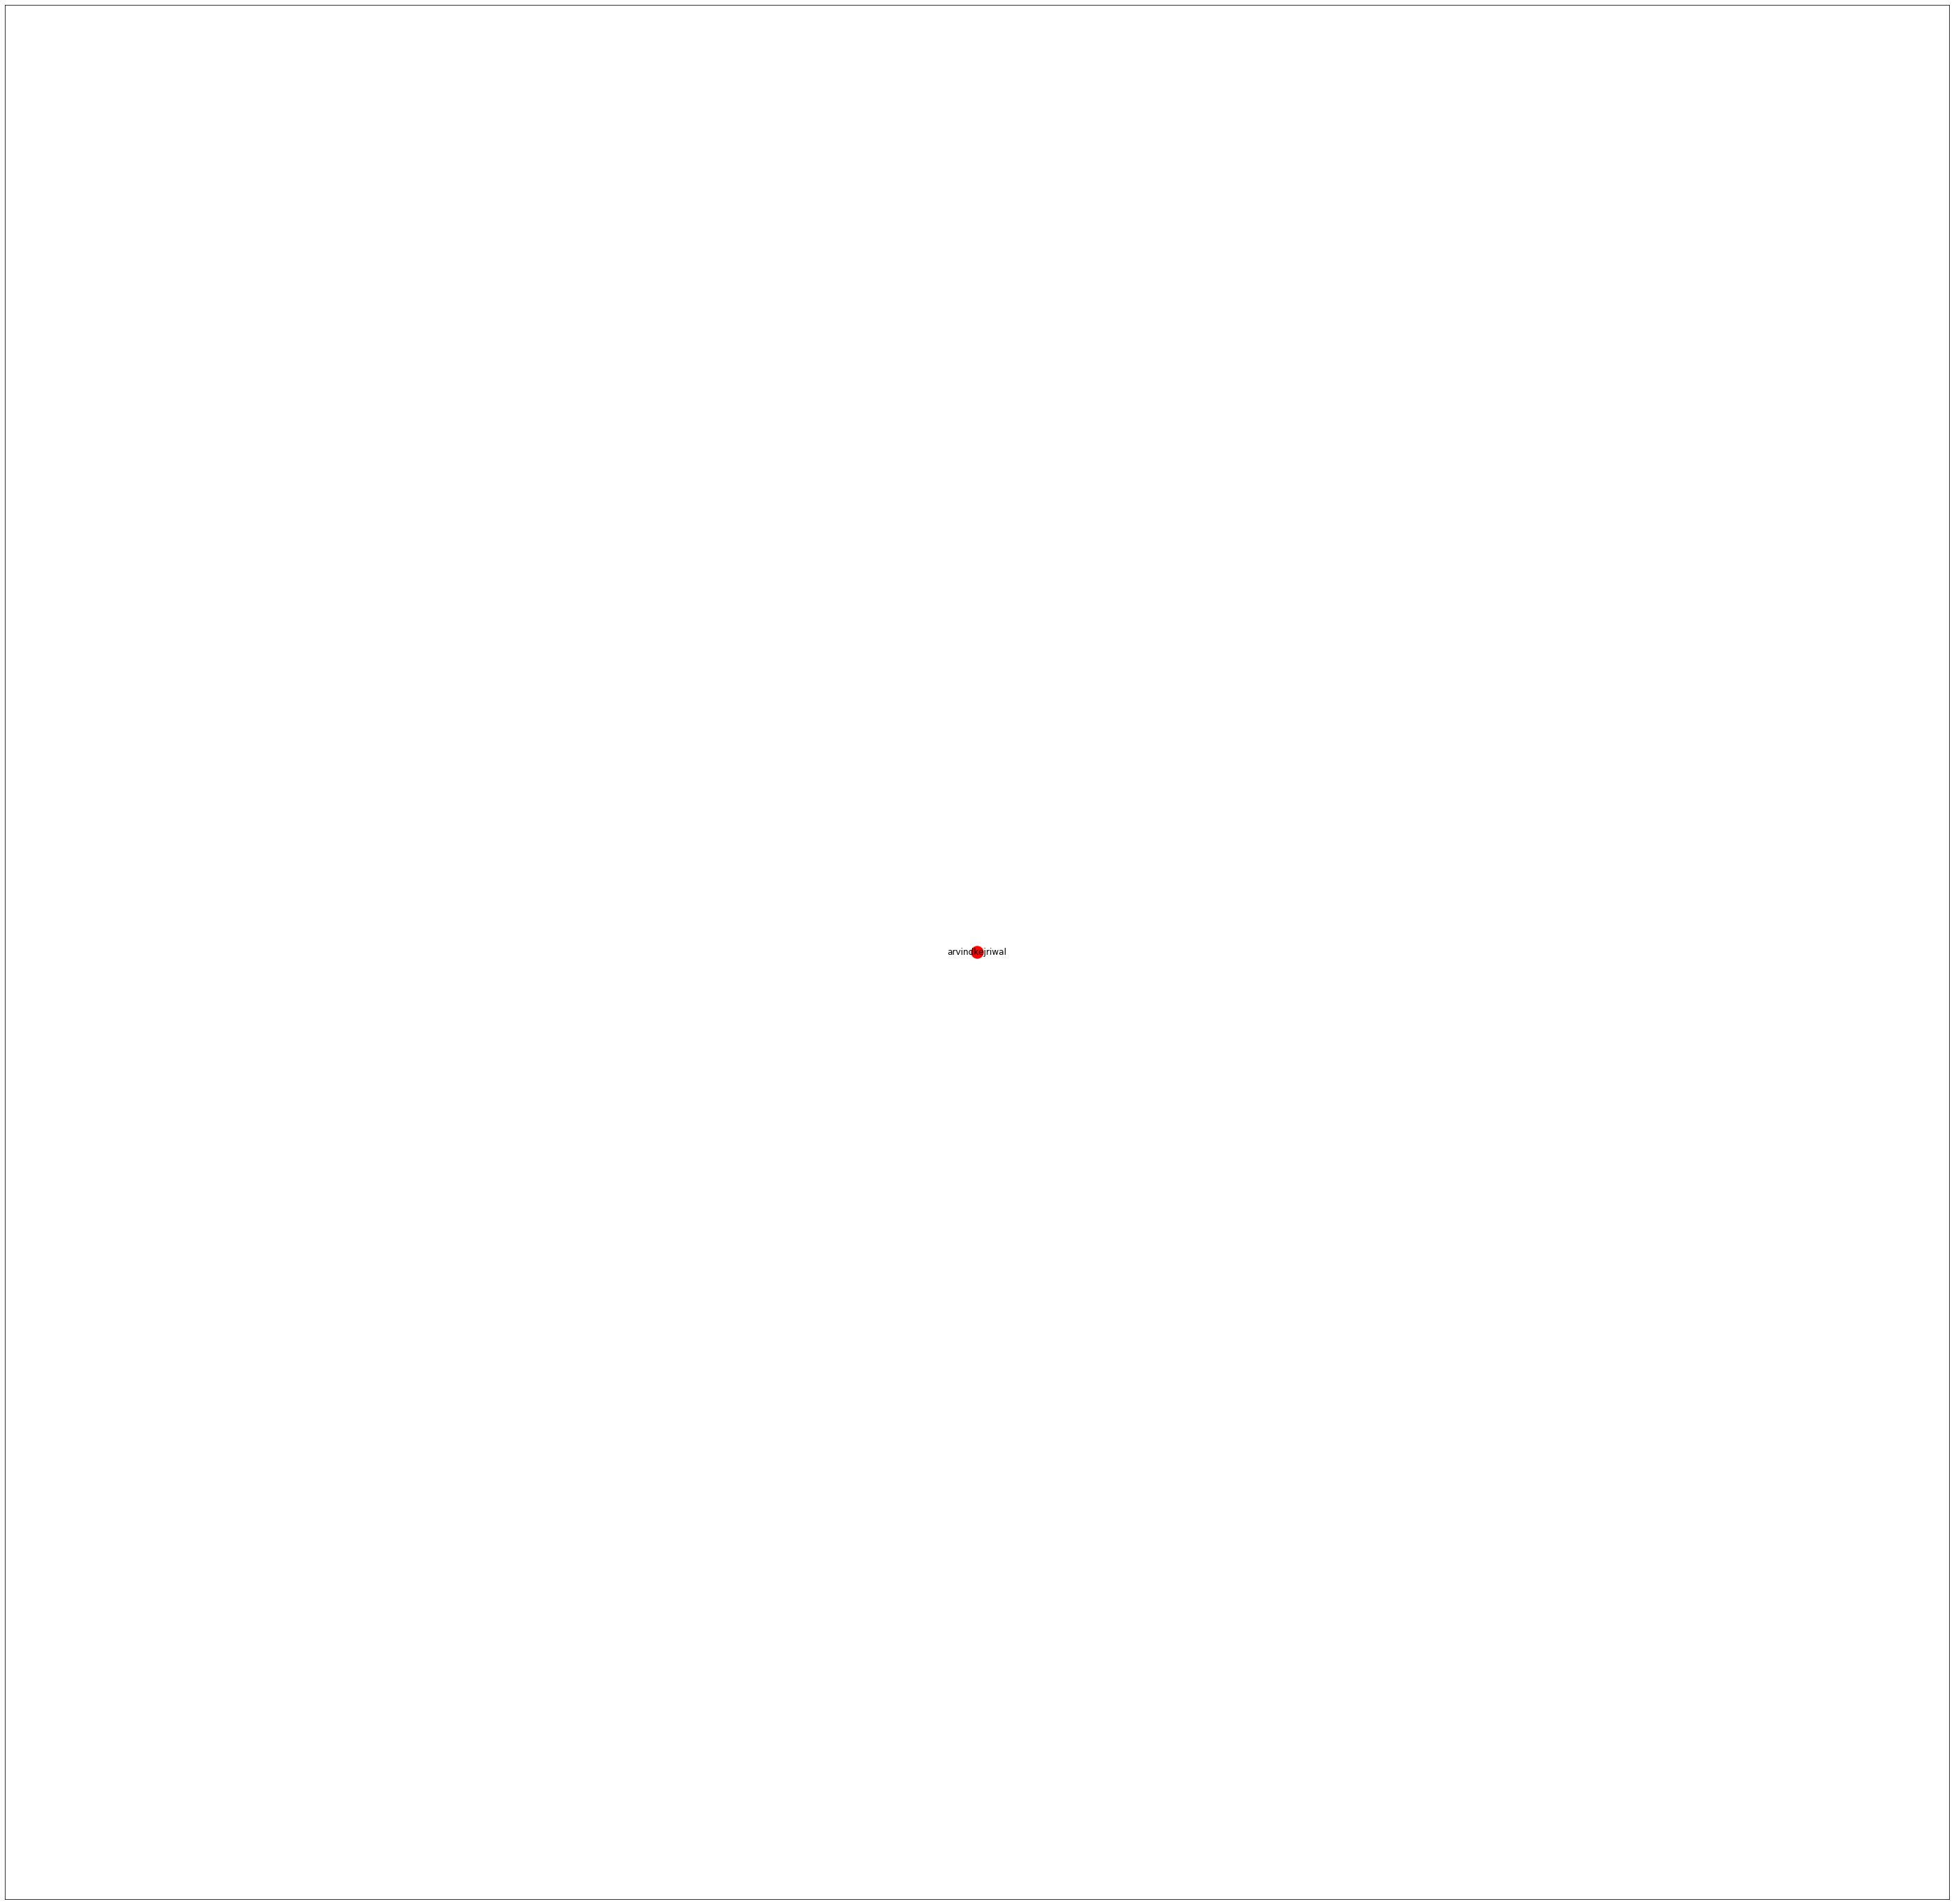

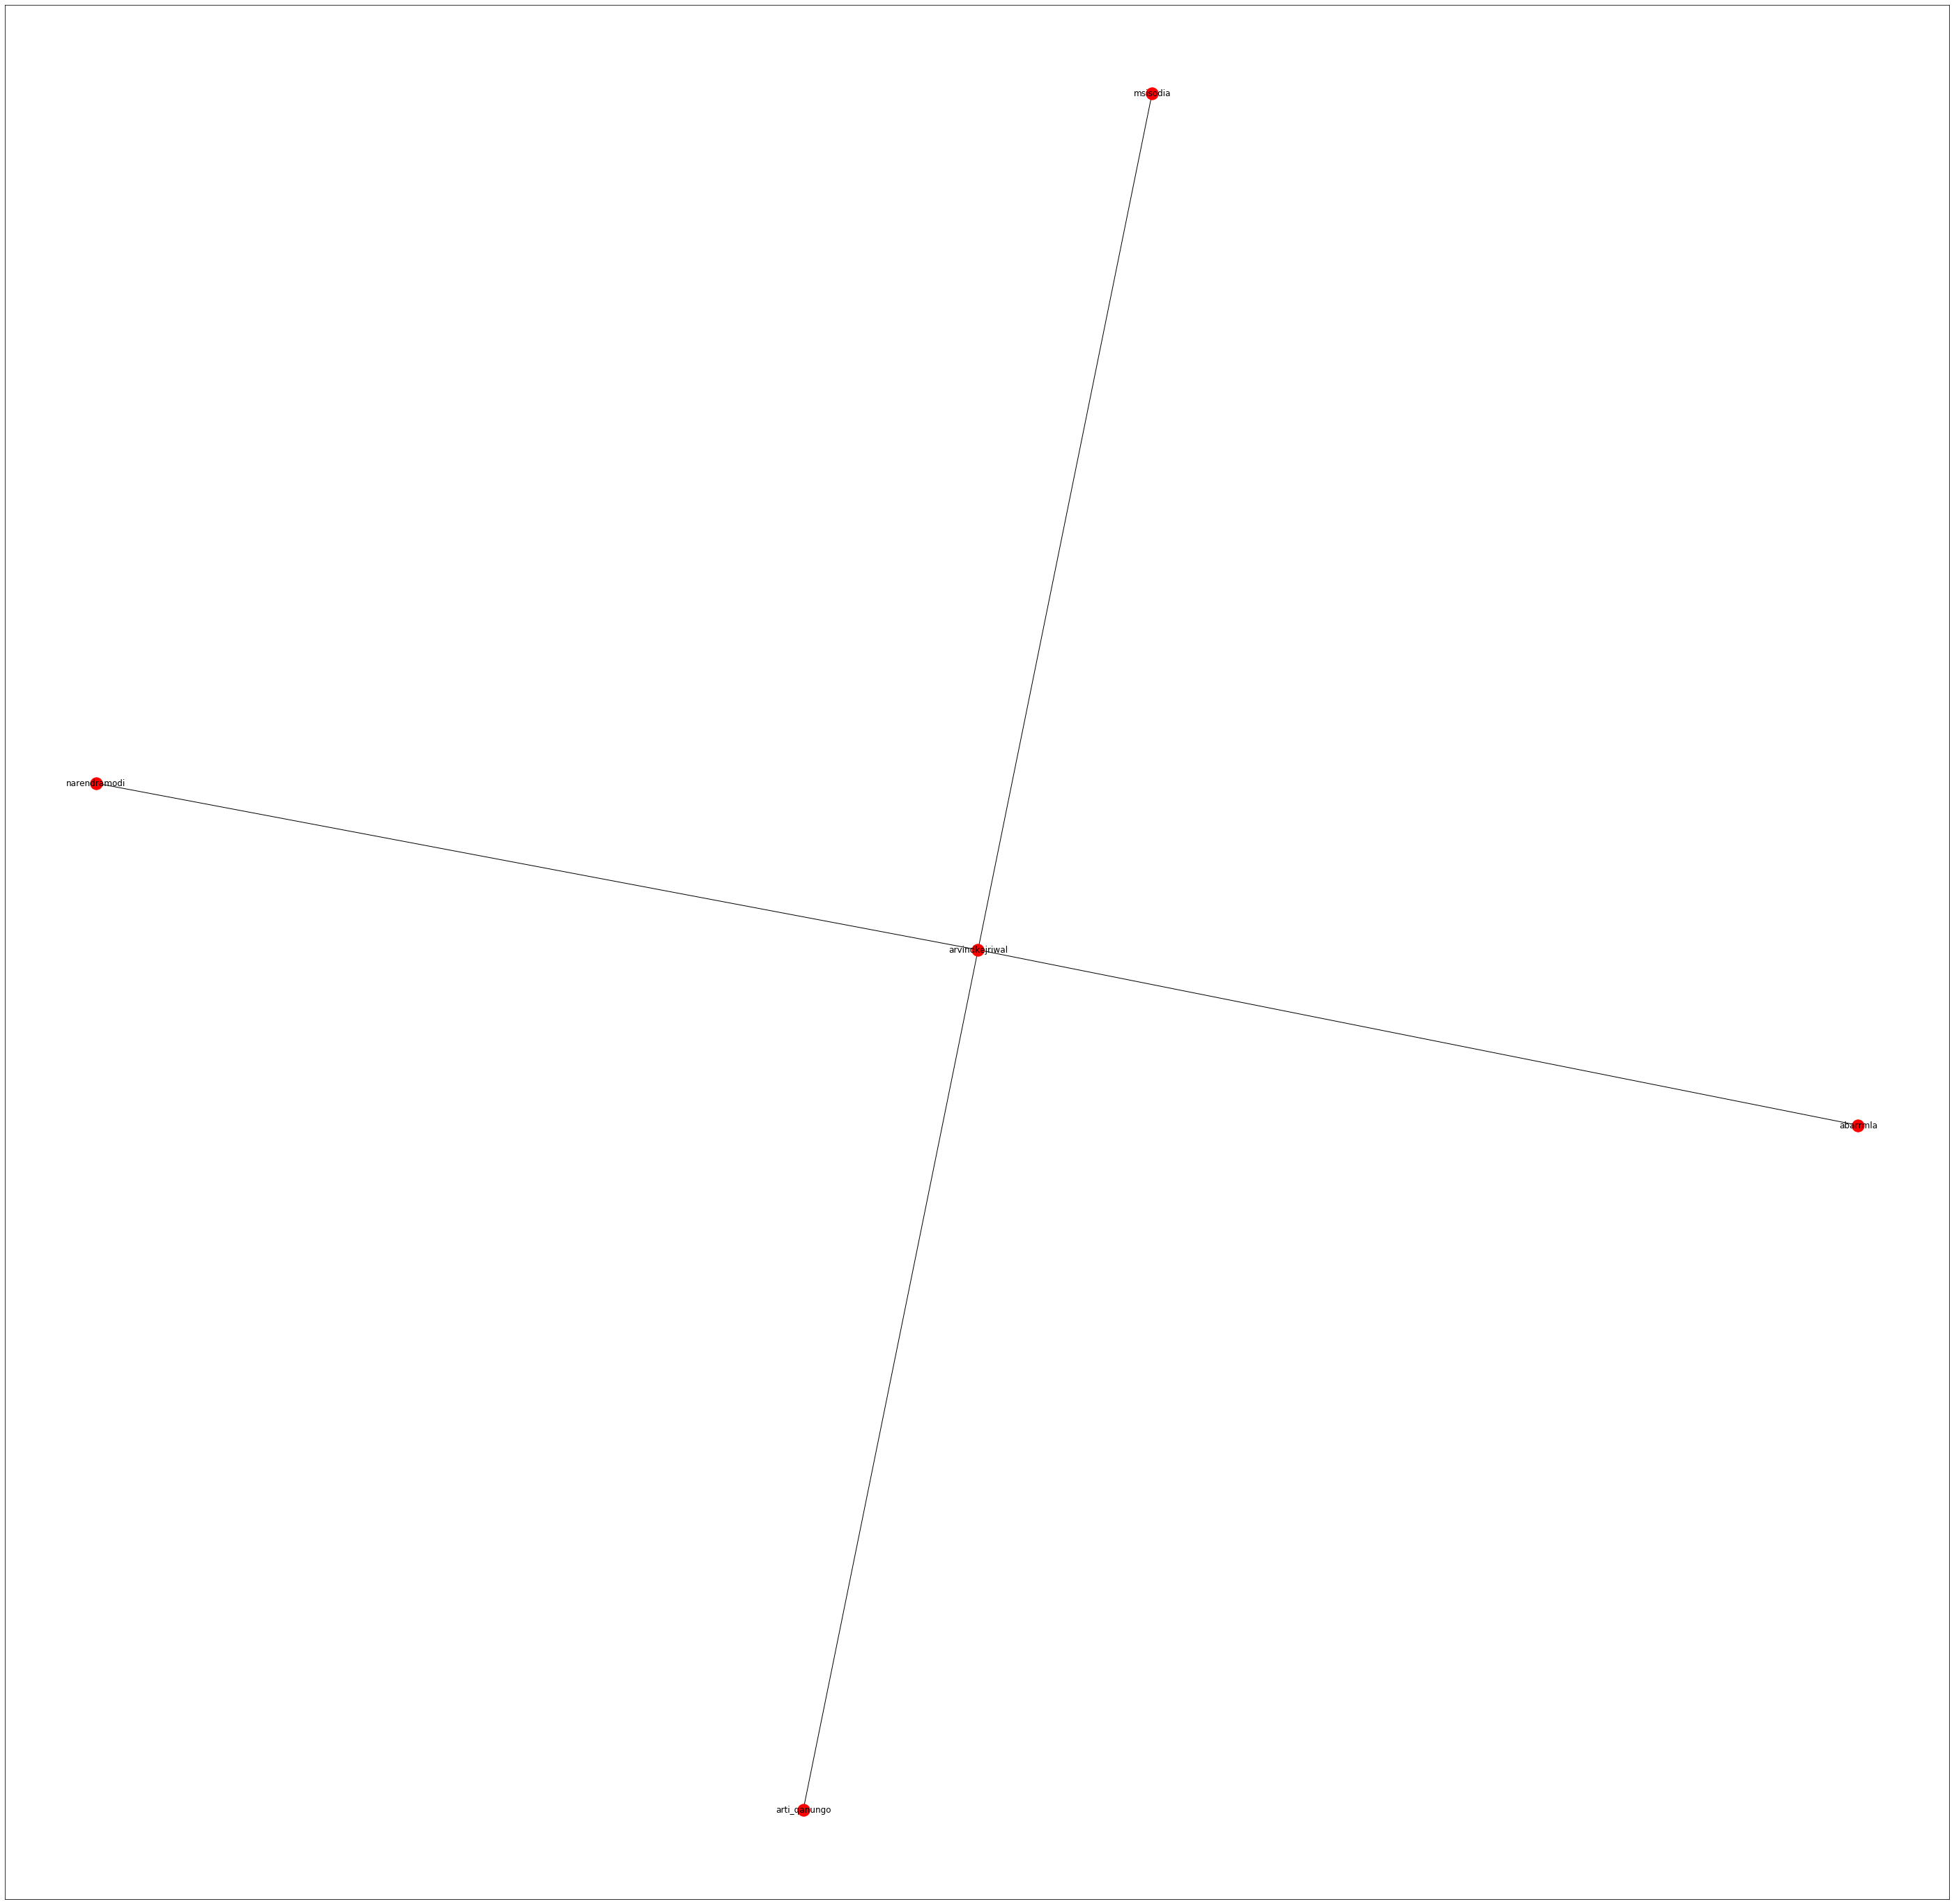

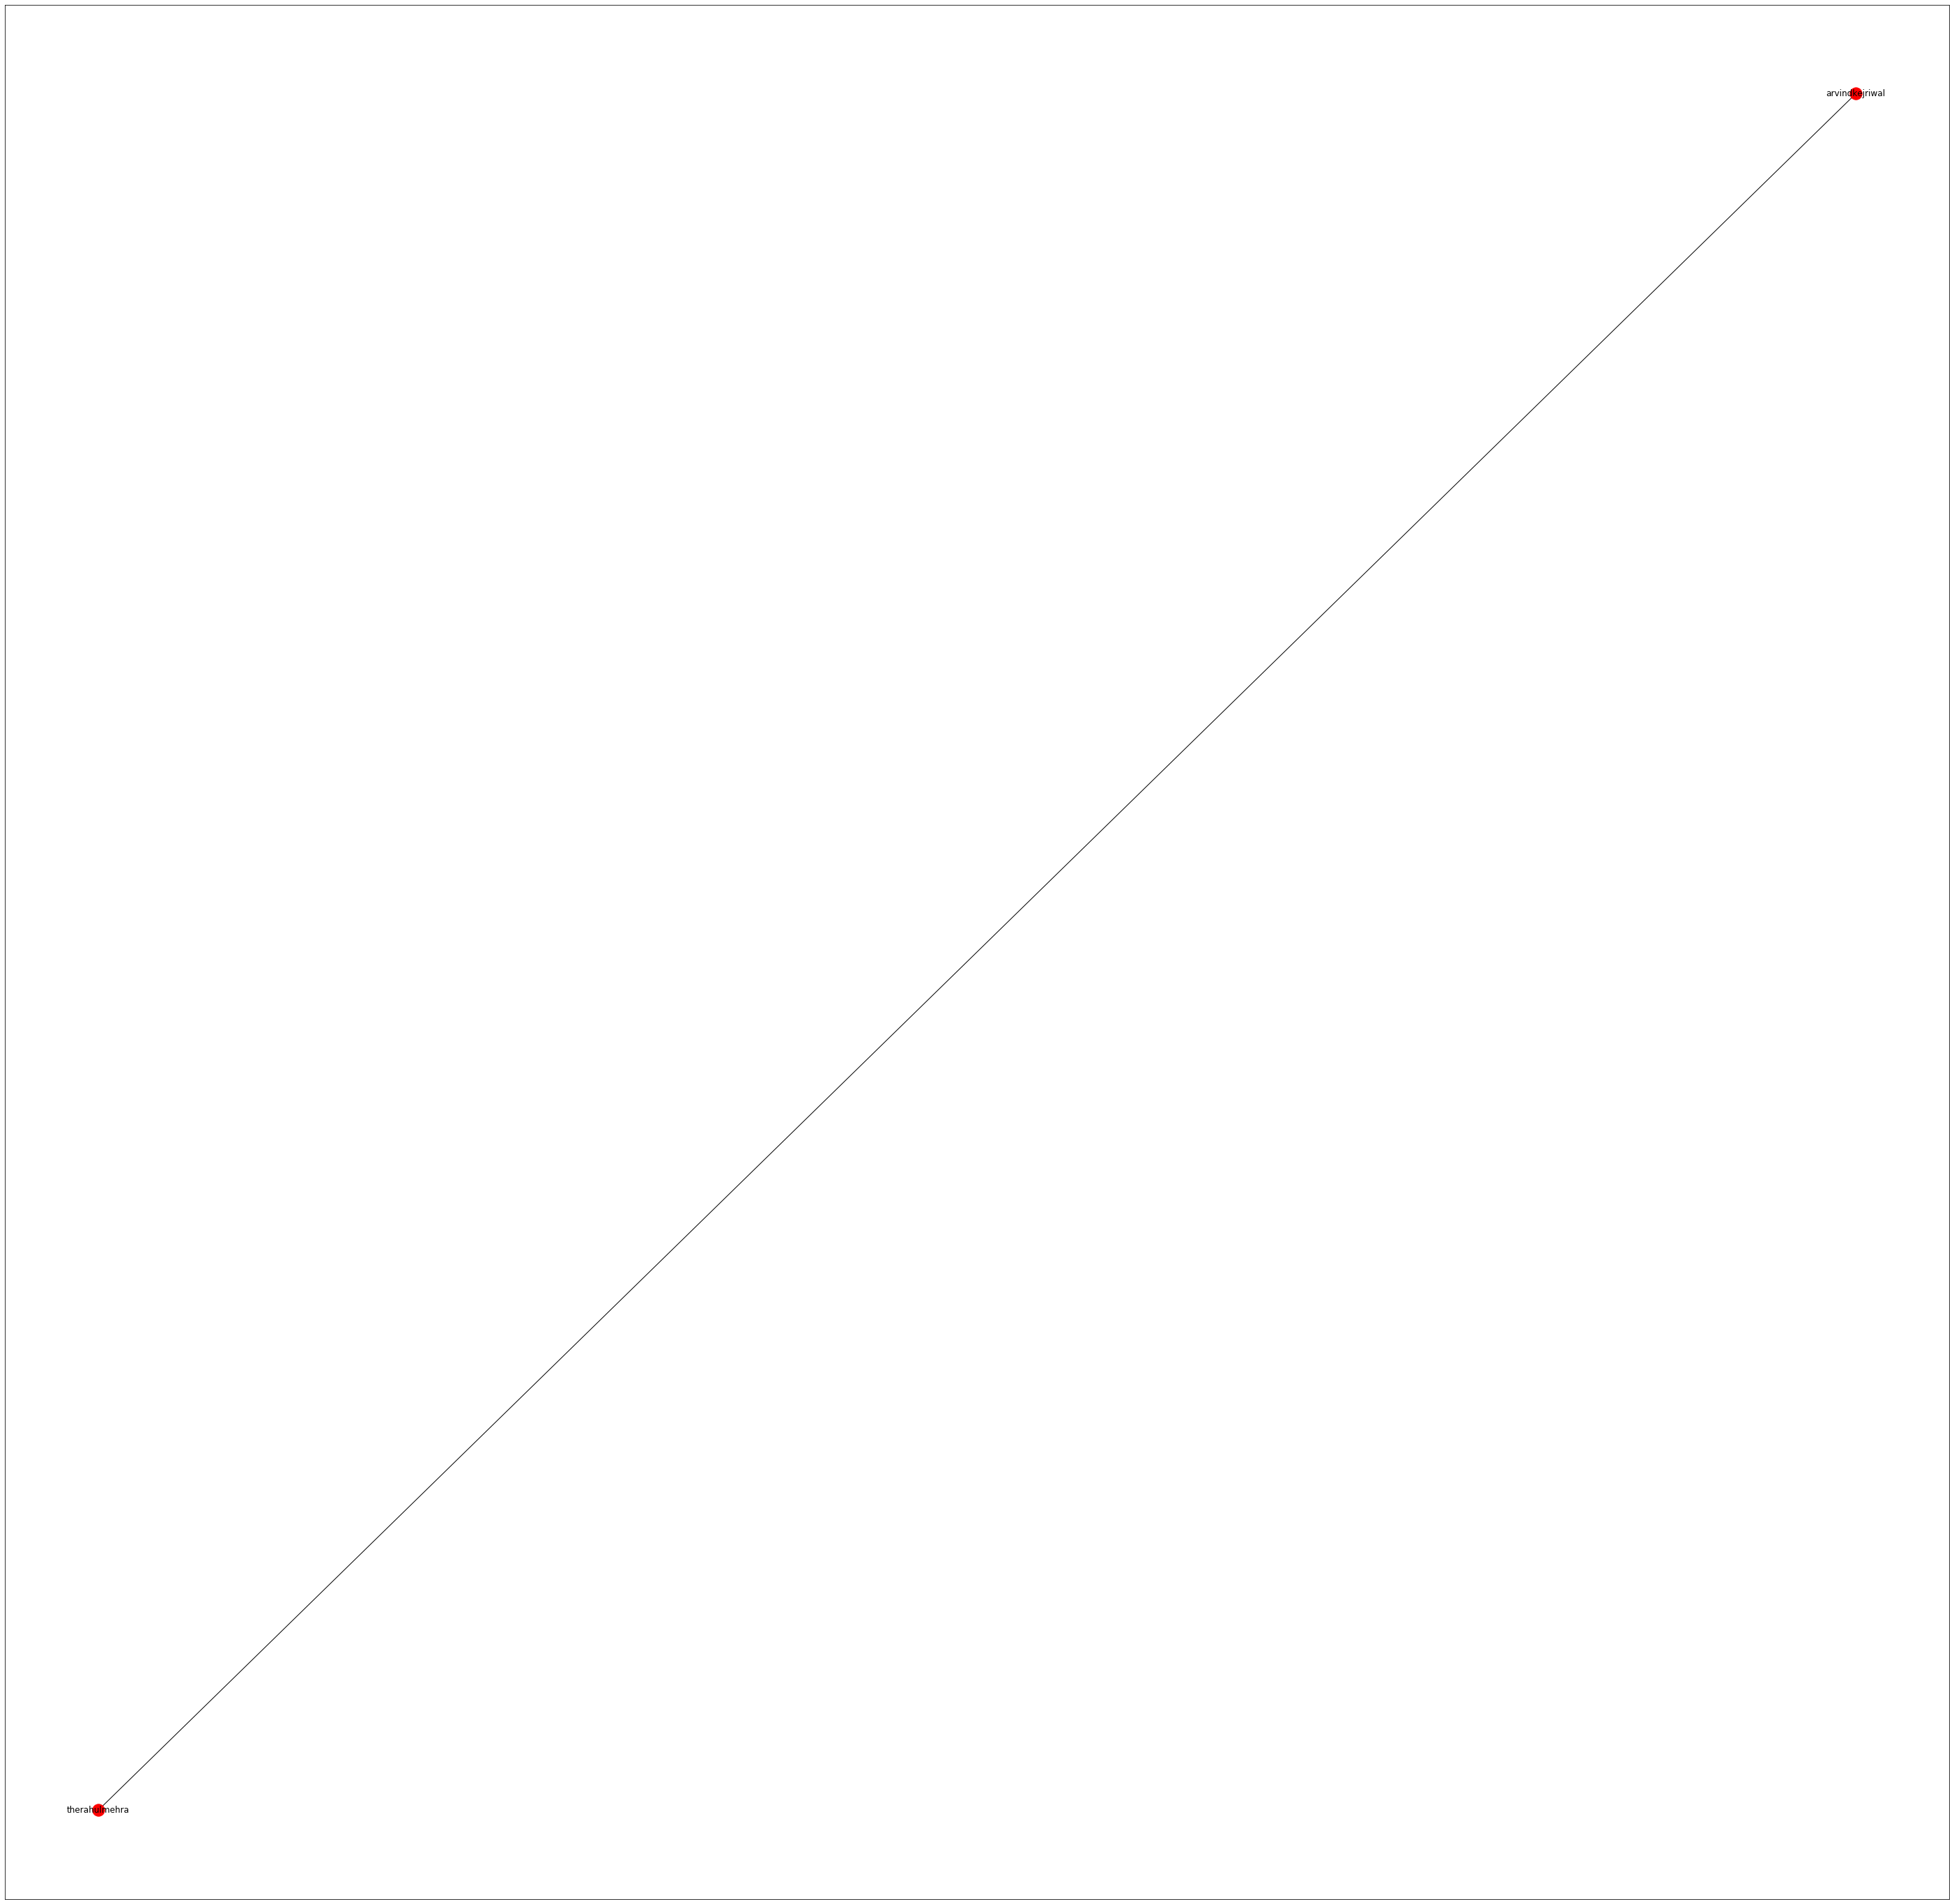

In [14]:
kejri_eco=make_graph("kejriwal_economy.csv")
kejri_edu=make_graph("kejriwal_education.csv")
kejri_sprt=make_graph("kejriwal_sports.csv")

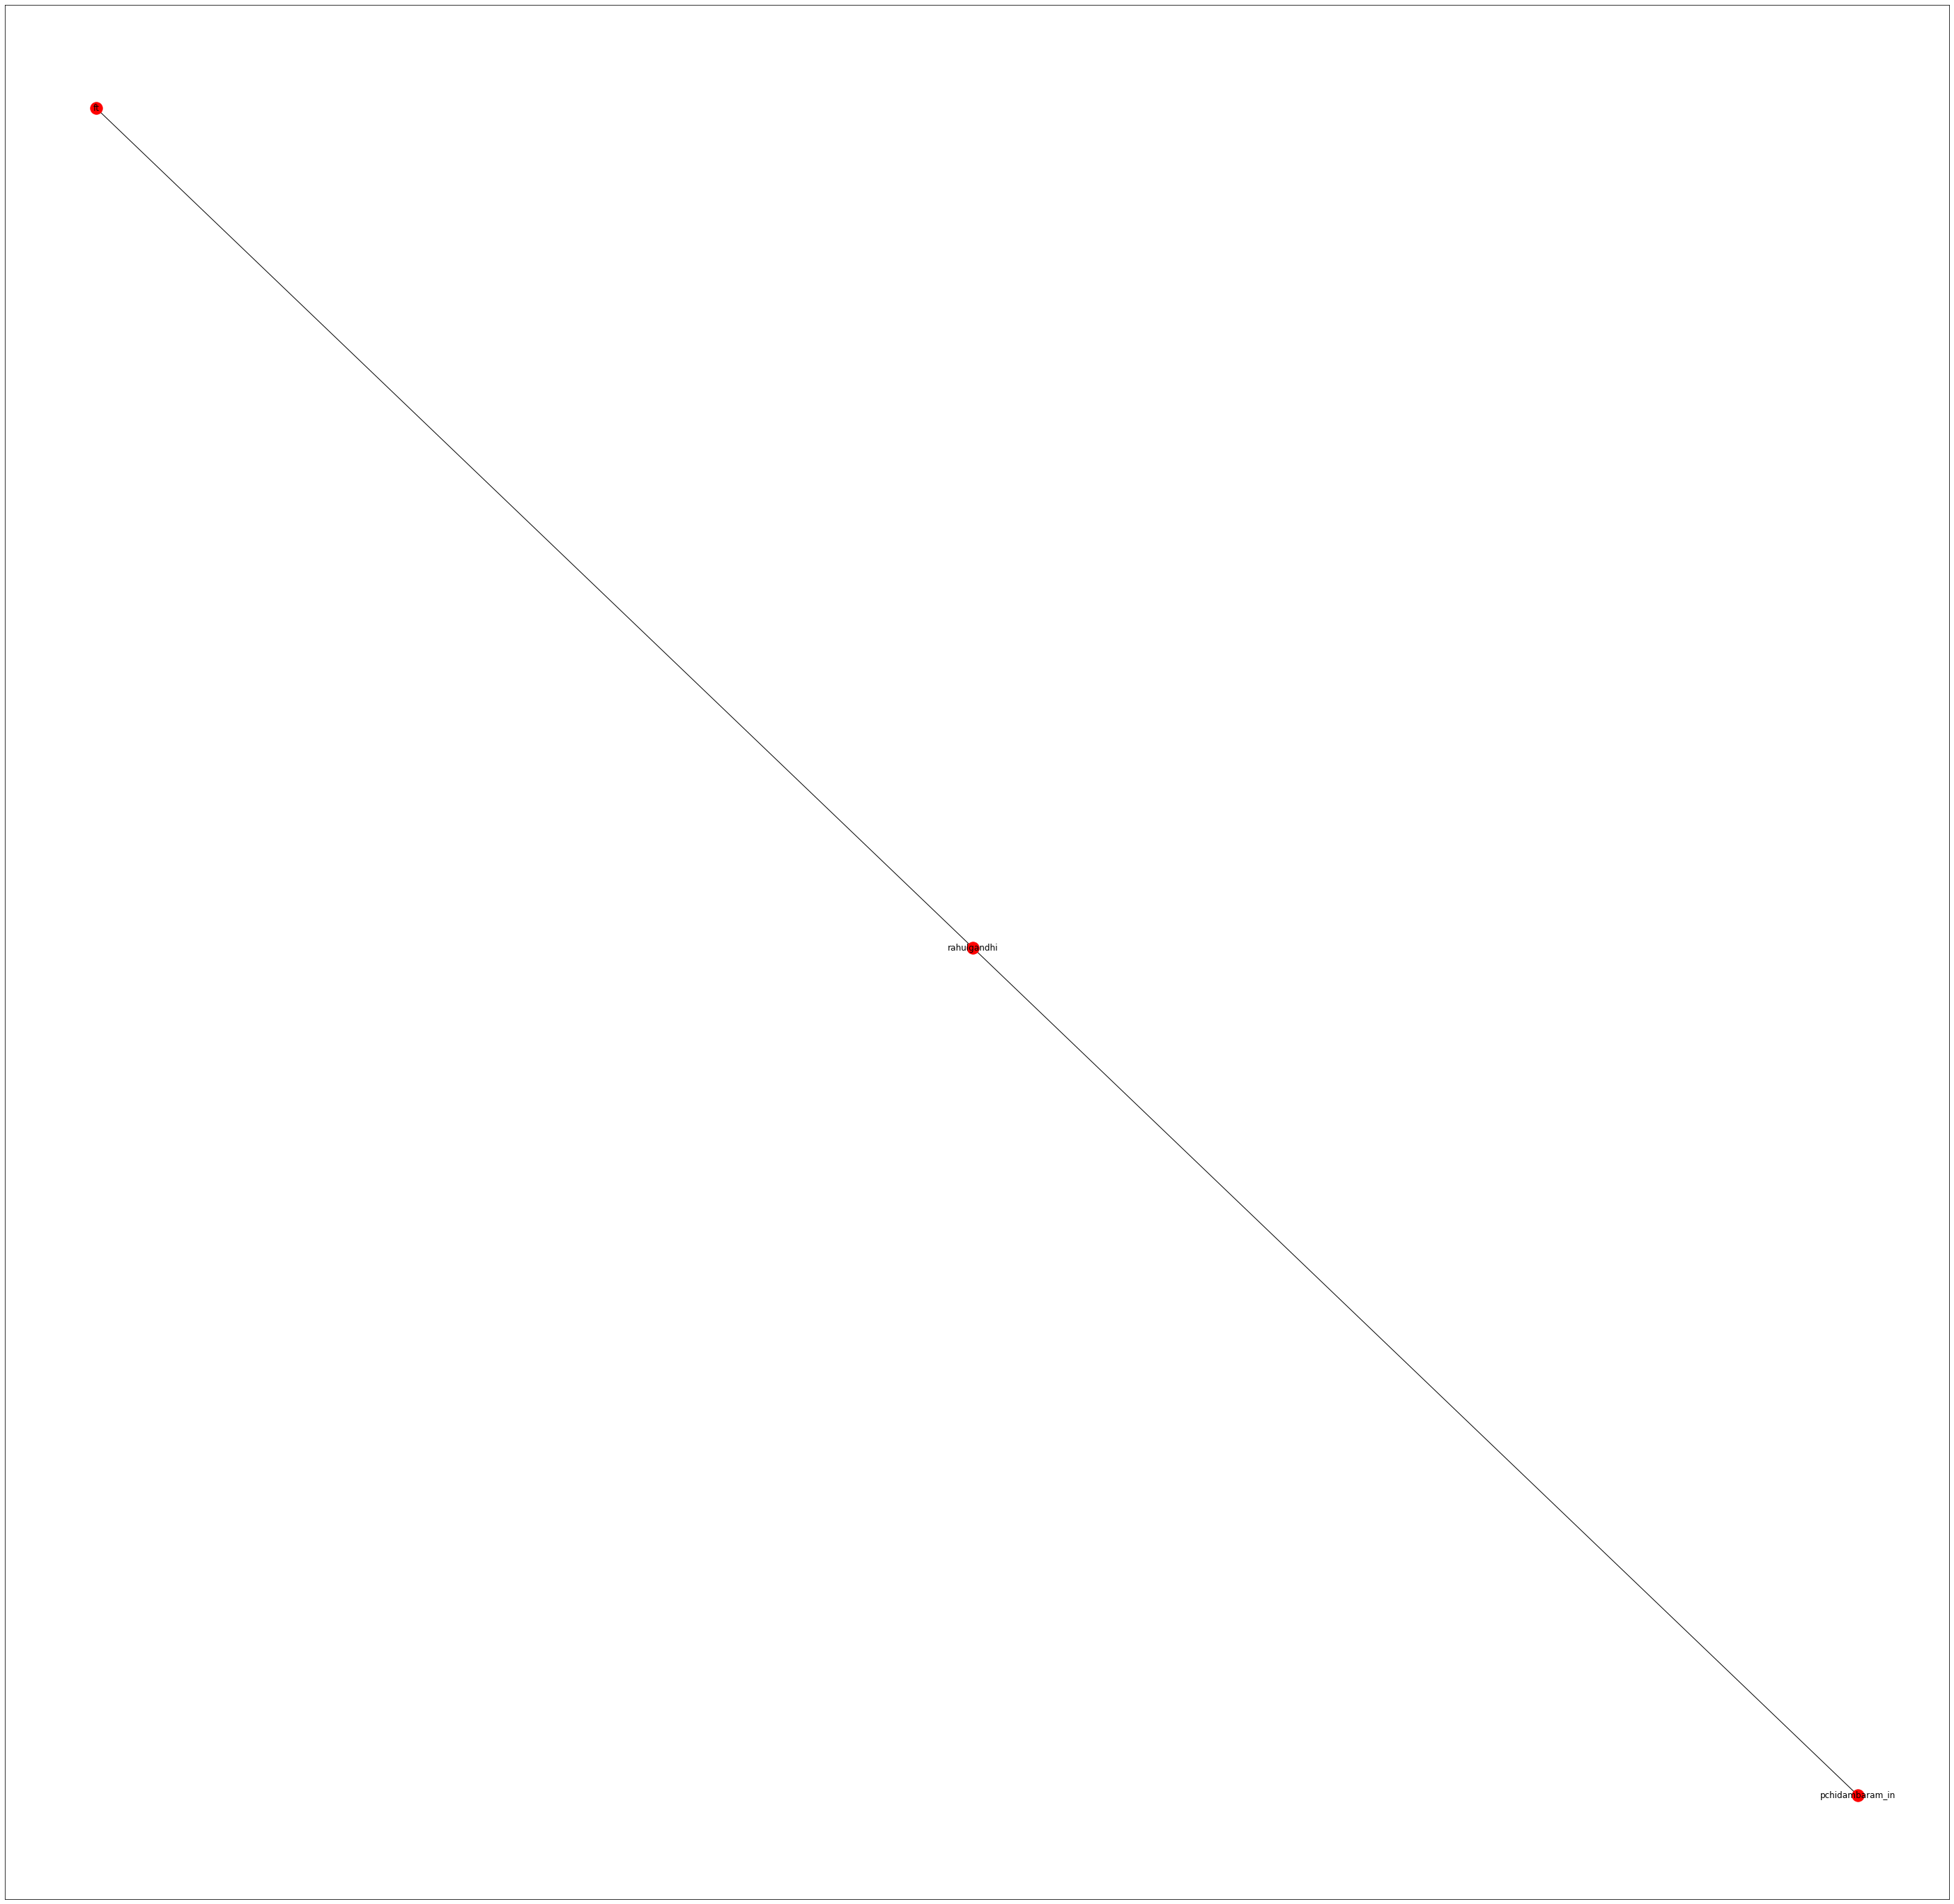

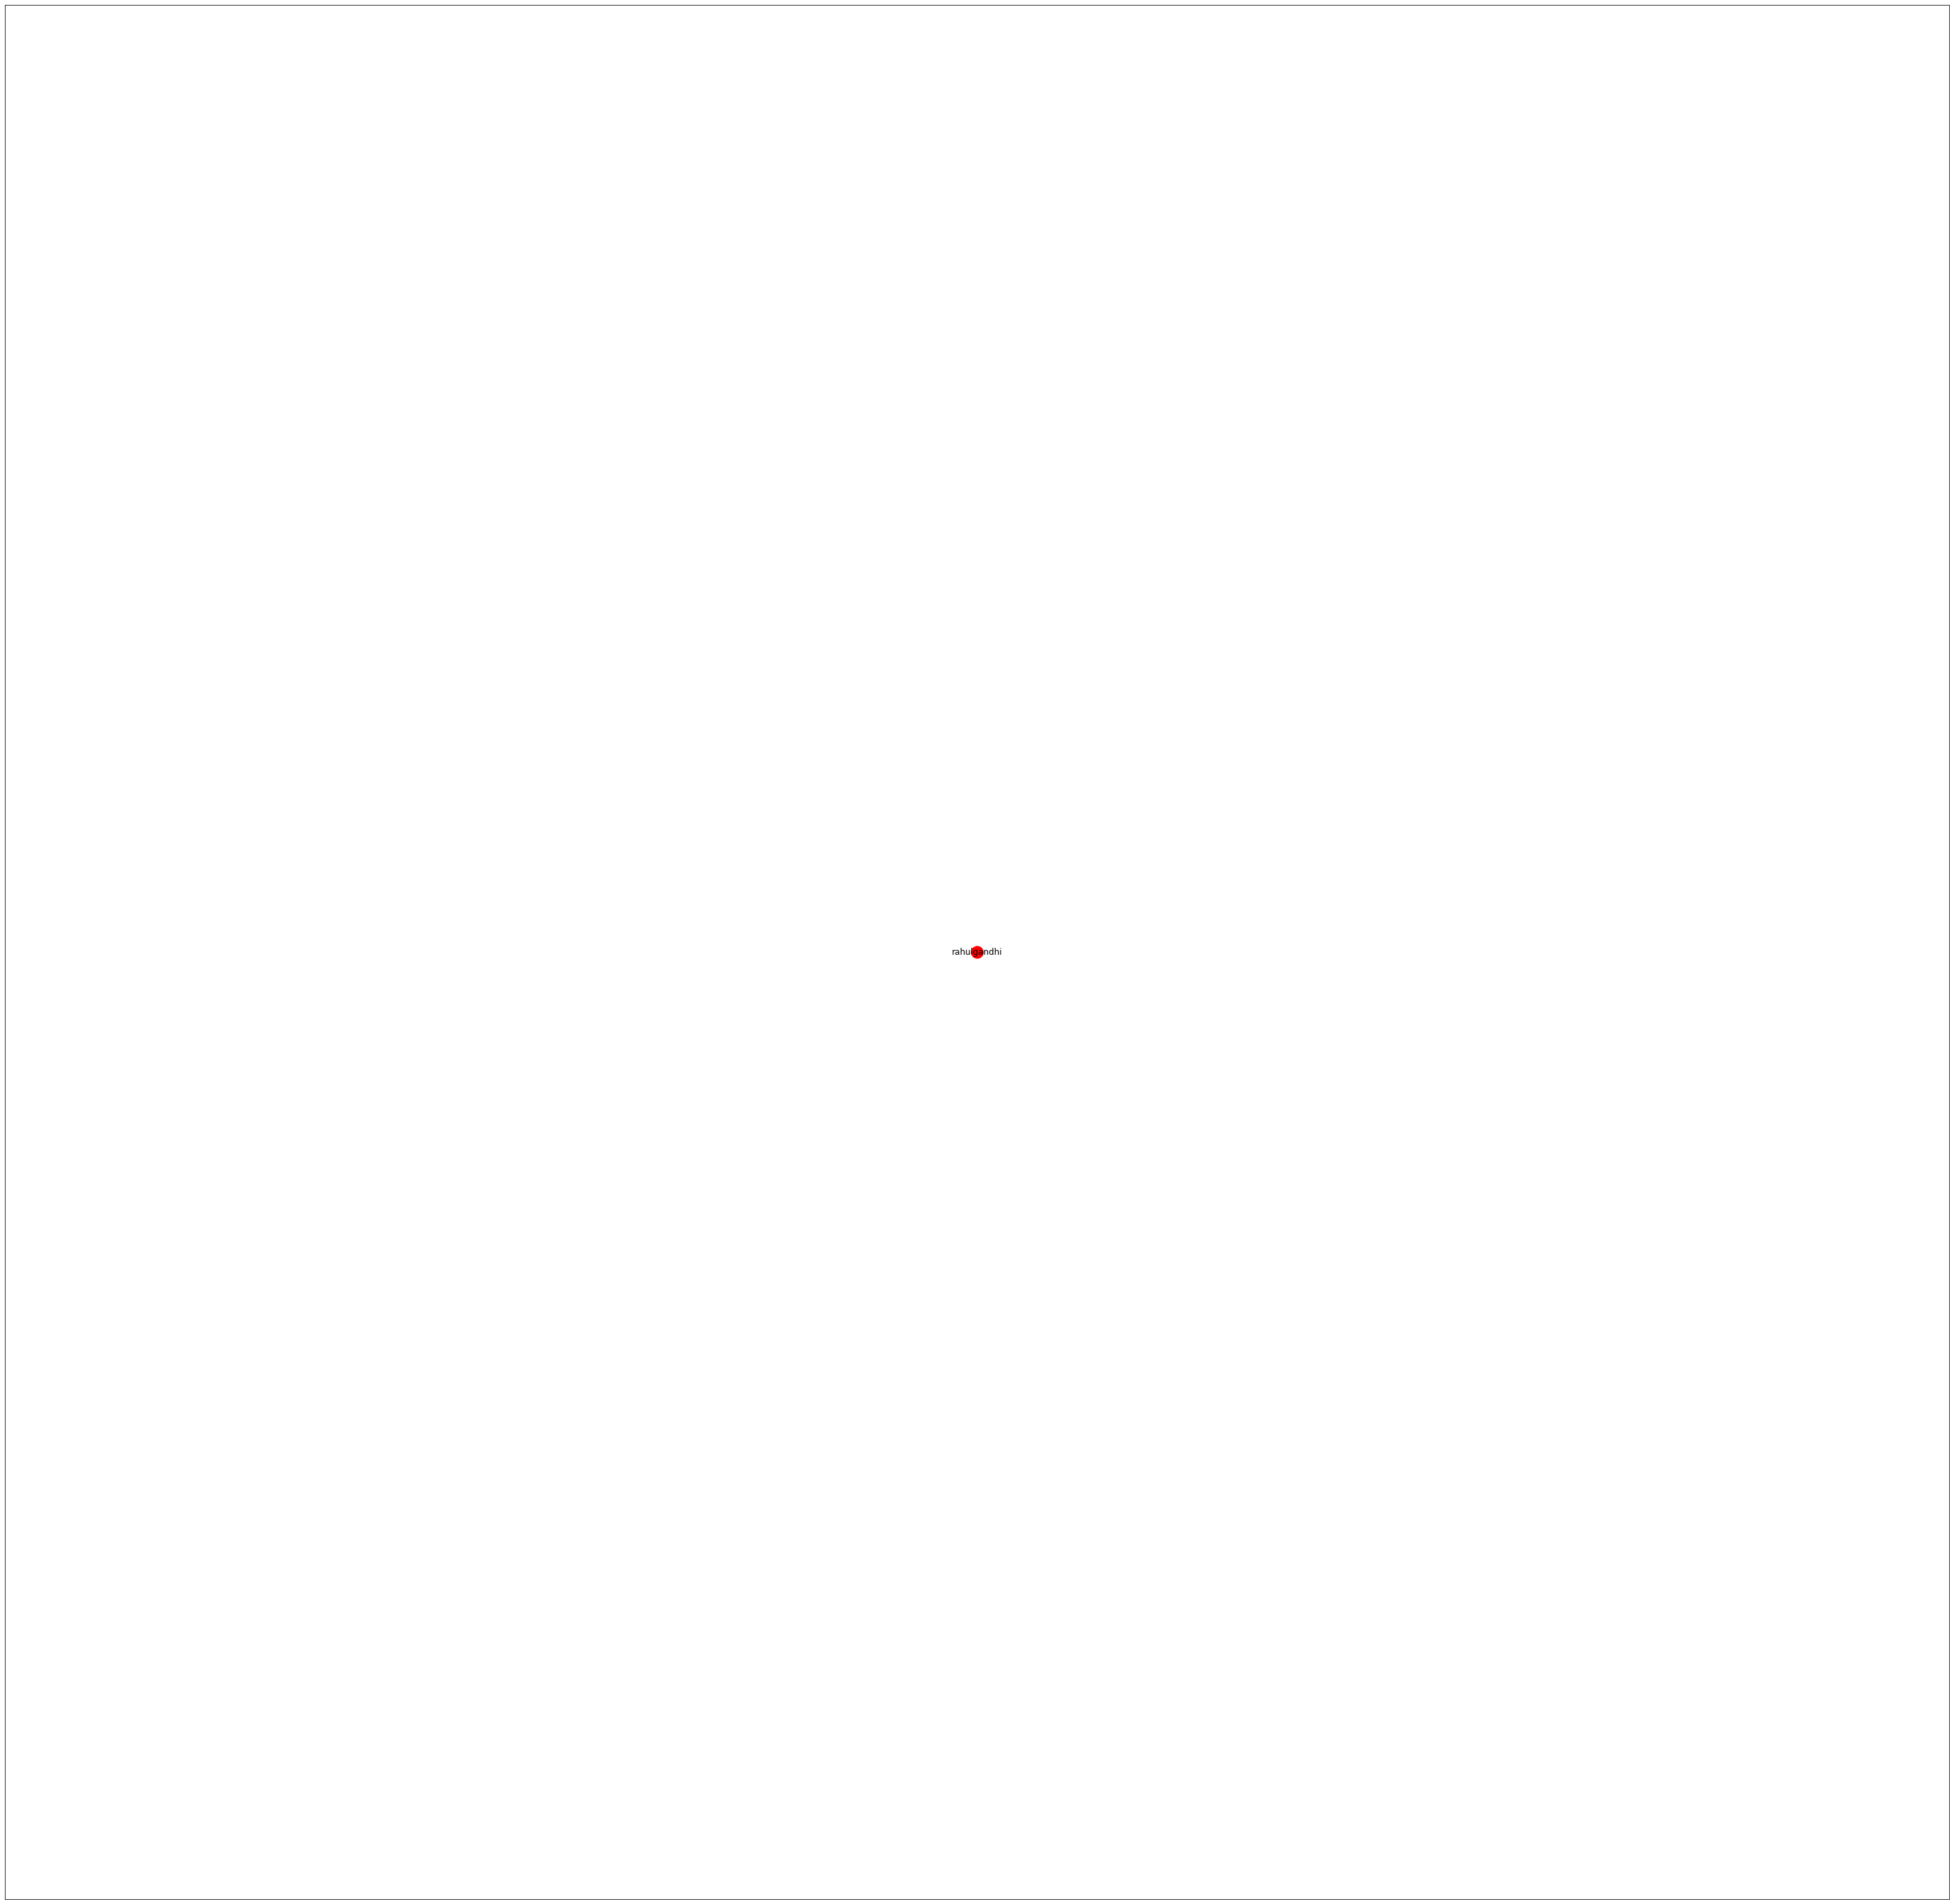

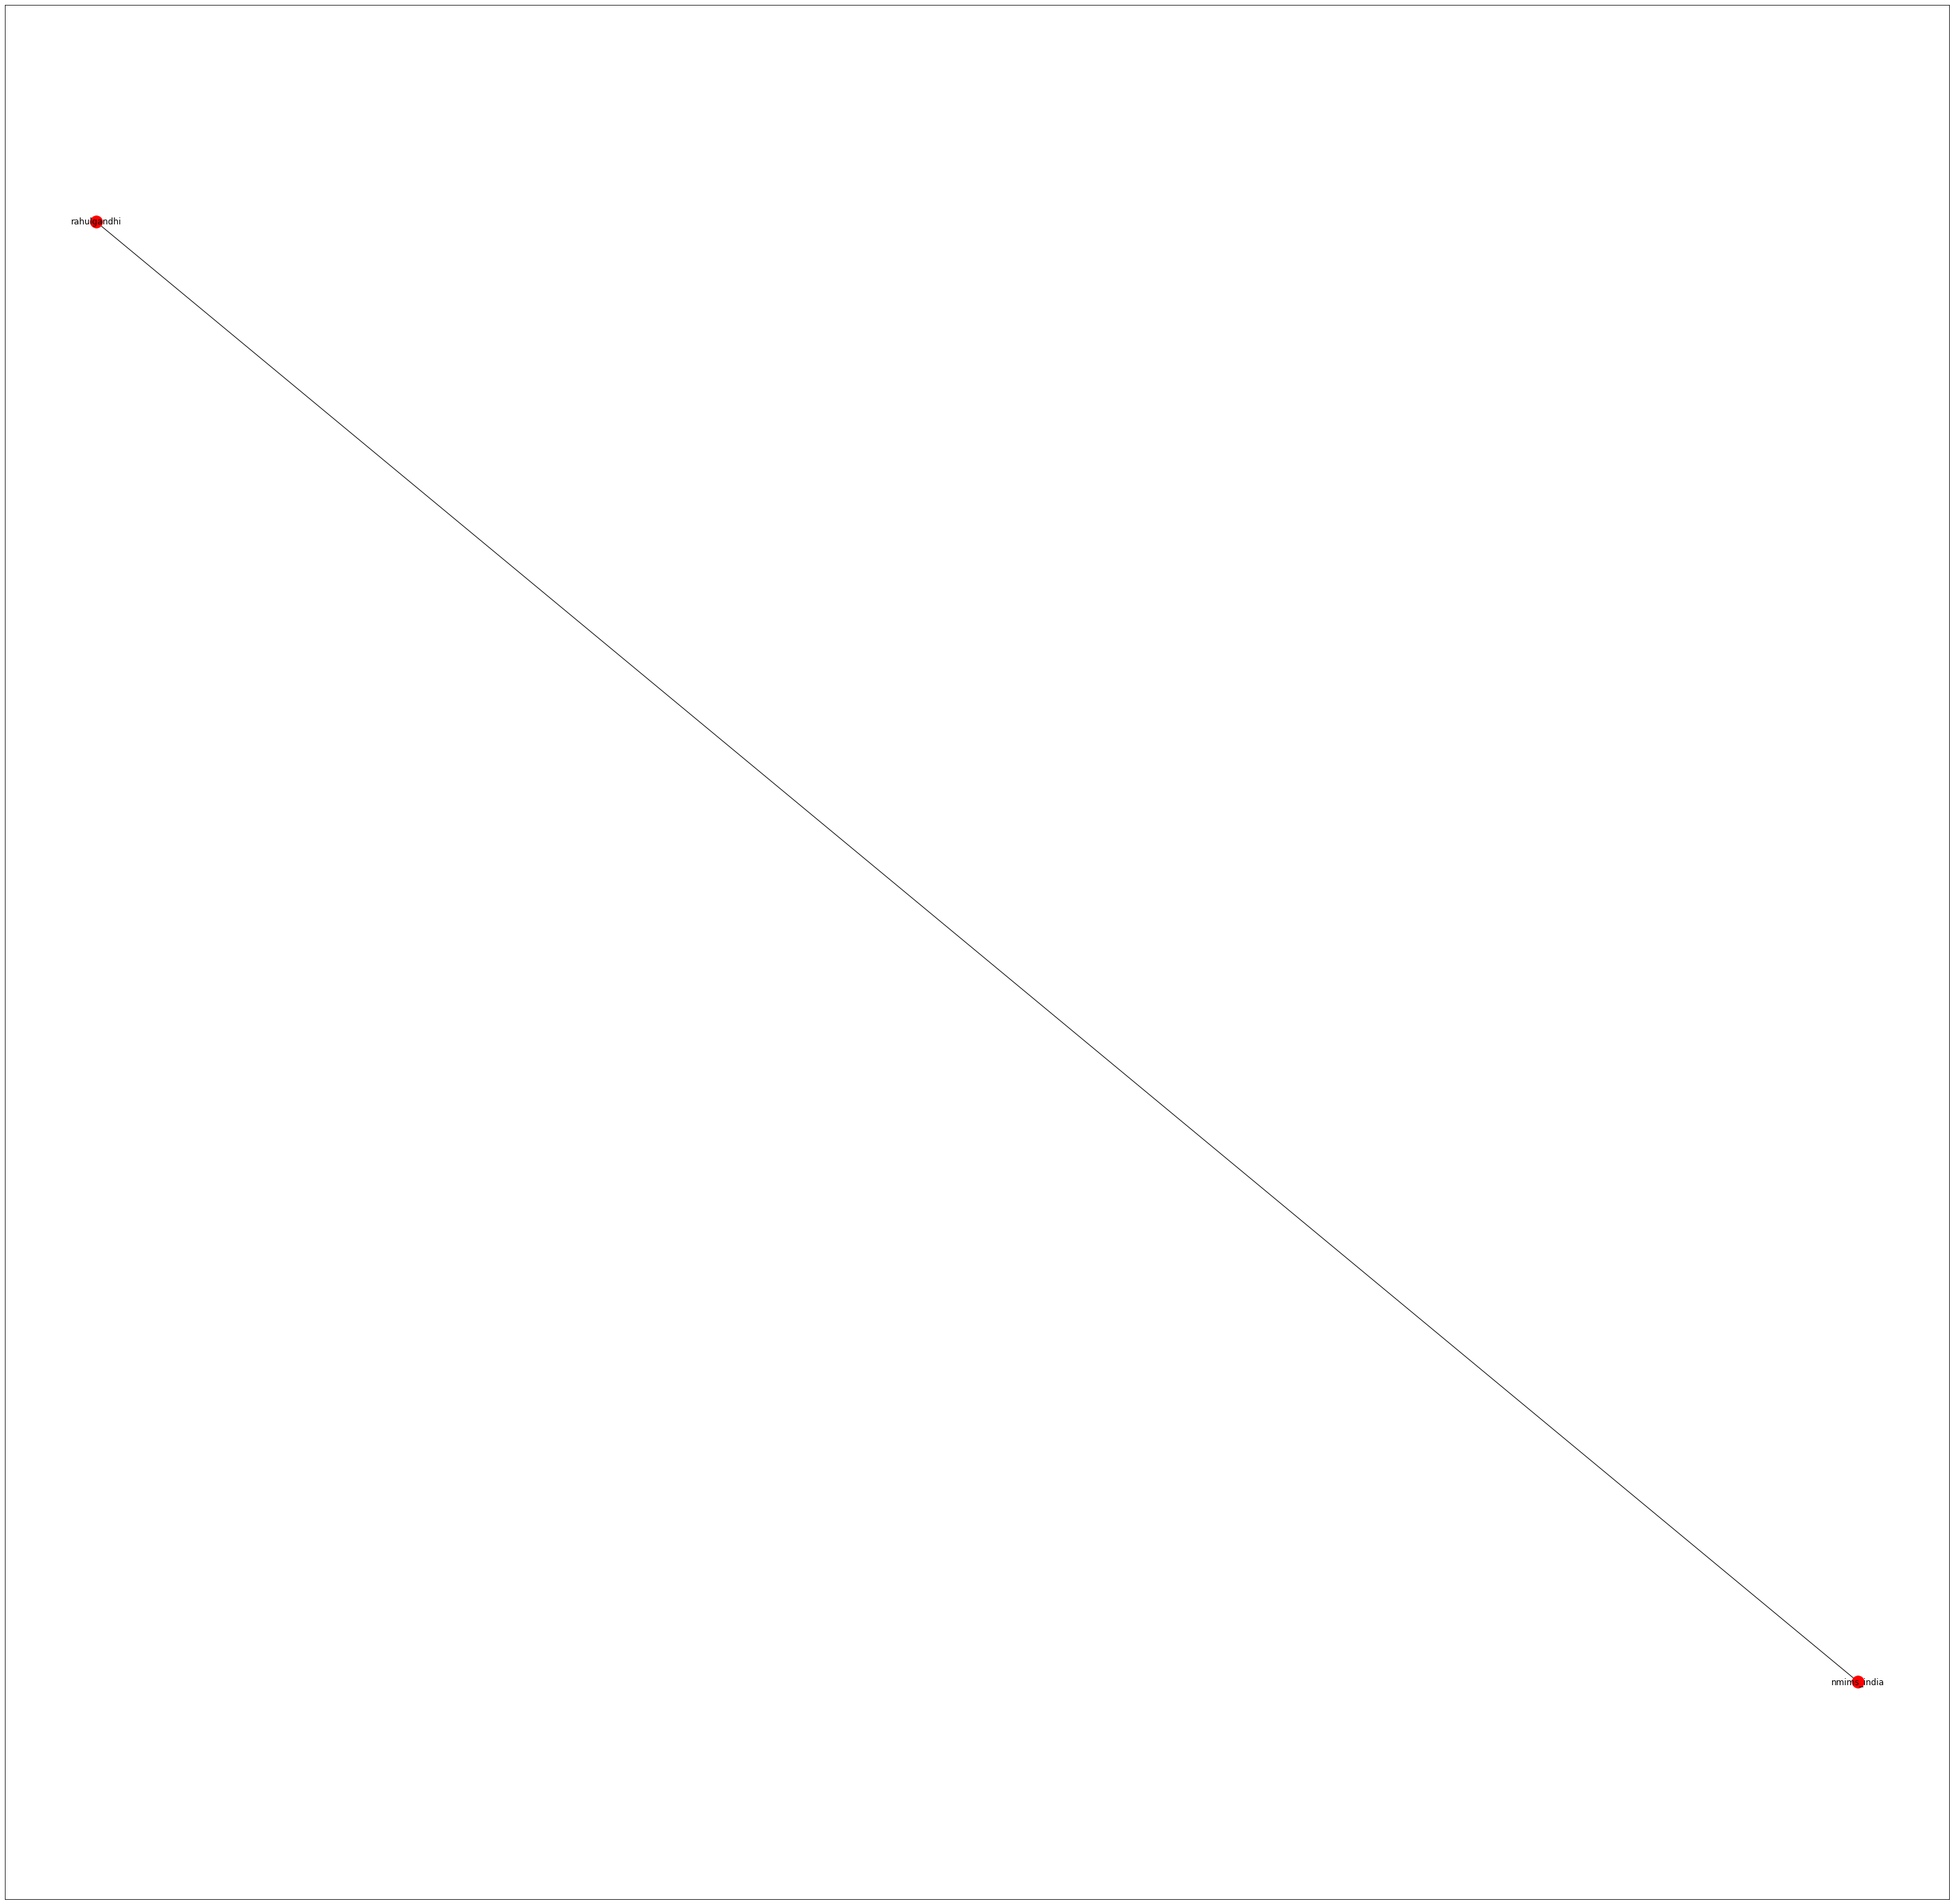

In [15]:
rahul_eco=make_graph("rahulgandhi_economy.csv")
rahul_edu=make_graph("rahulgandhi_education.csv")
rahul_sprt=make_graph("rahulgandhi_sports.csv")

In [16]:
# Algoritm for max and min indegree and outdegree comparison this is also used for comparison of the average indegree
# and outdegree comparison of a node which represents the importance of the node
def stat(graph):
    stats=[]
    size=graph.size(weight="weight")
    size
    num_edges=graph.number_of_edges()
    num_edges
    max_ind=0.000
    max_out=0.000
    sum_in=0.000
    sum_out=0.000
    ind_by_out=0.000
    for node in list(graph.nodes()):
        ind=graph.in_degree(node)
        out=graph.out_degree(node)
        sum_in+=ind
        sum_out+=out
        max_ind=max(max_ind,ind)
        max_out=max(max_out,out)
        if(out!=0):
            ind_by_out+=(ind/out)
    leng=len(list(graph.nodes()))
    avg_ind_by_out=ind_by_out/leng
    avg_in=sum_in/leng
    avg_out=sum_out/leng
    stats.append(size)
    stats.append(num_edges)
    stats.append(max_ind)
    stats.append(max_out)
    stats.append(avg_ind_by_out)
    return stats

# Calculating Graph Metrics for individual comparison


[('narendramodi', 1.0),
 ('ukenyatta', 0.09090909090909091),
 ('vkendra', 0.09090909090909091),
 ('drramansingh', 0.09090909090909091),
 ('bjp4gujarat', 0.09090909090909091),
 ('turnbullmalcolm', 0.09090909090909091),
 ('ians_india', 0.09090909090909091),
 ('drrpnishank', 0.09090909090909091),
 ('amritanandamayi', 0.09090909090909091),
 ('leehsienloong', 0.09090909090909091),
 ('kremlinrussia', 0.09090909090909091),
 ('authackeray', 0.09090909090909091)]

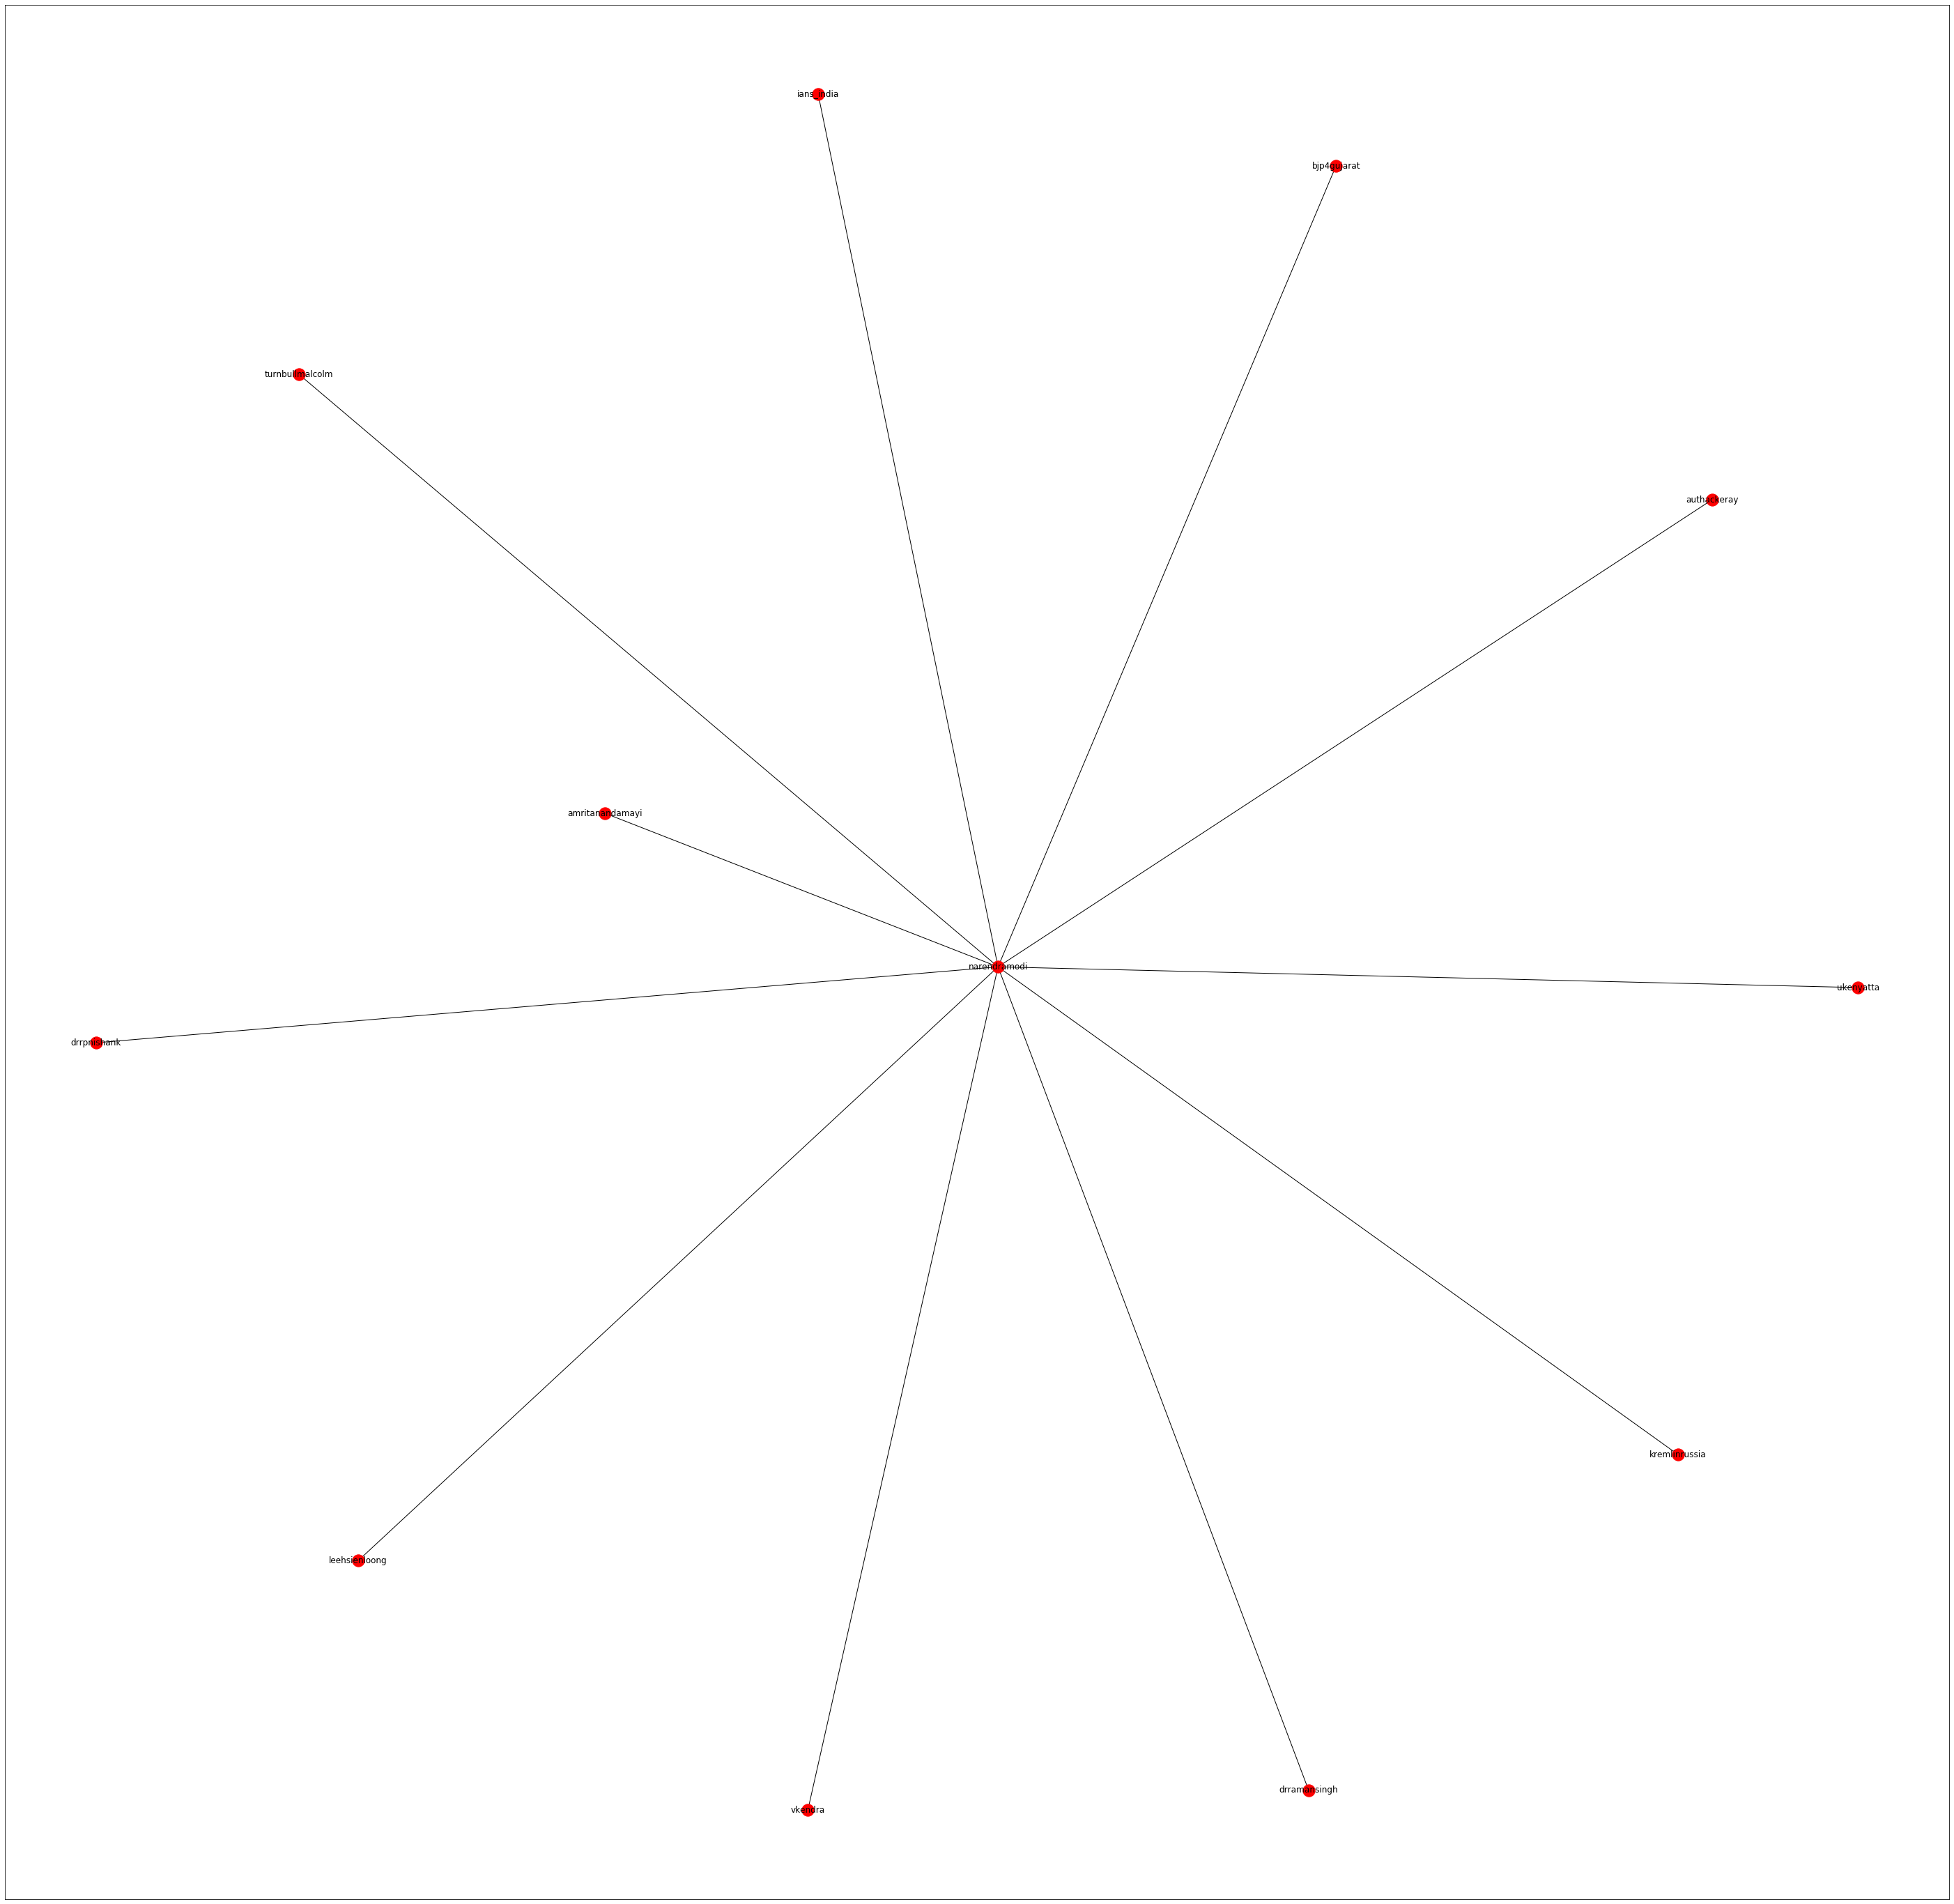

In [20]:
from operator import itemgetter
degc = nx.degree_centrality(make_graph("modi_education.csv"))        # Calculating Degree Centrality of the nodes
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

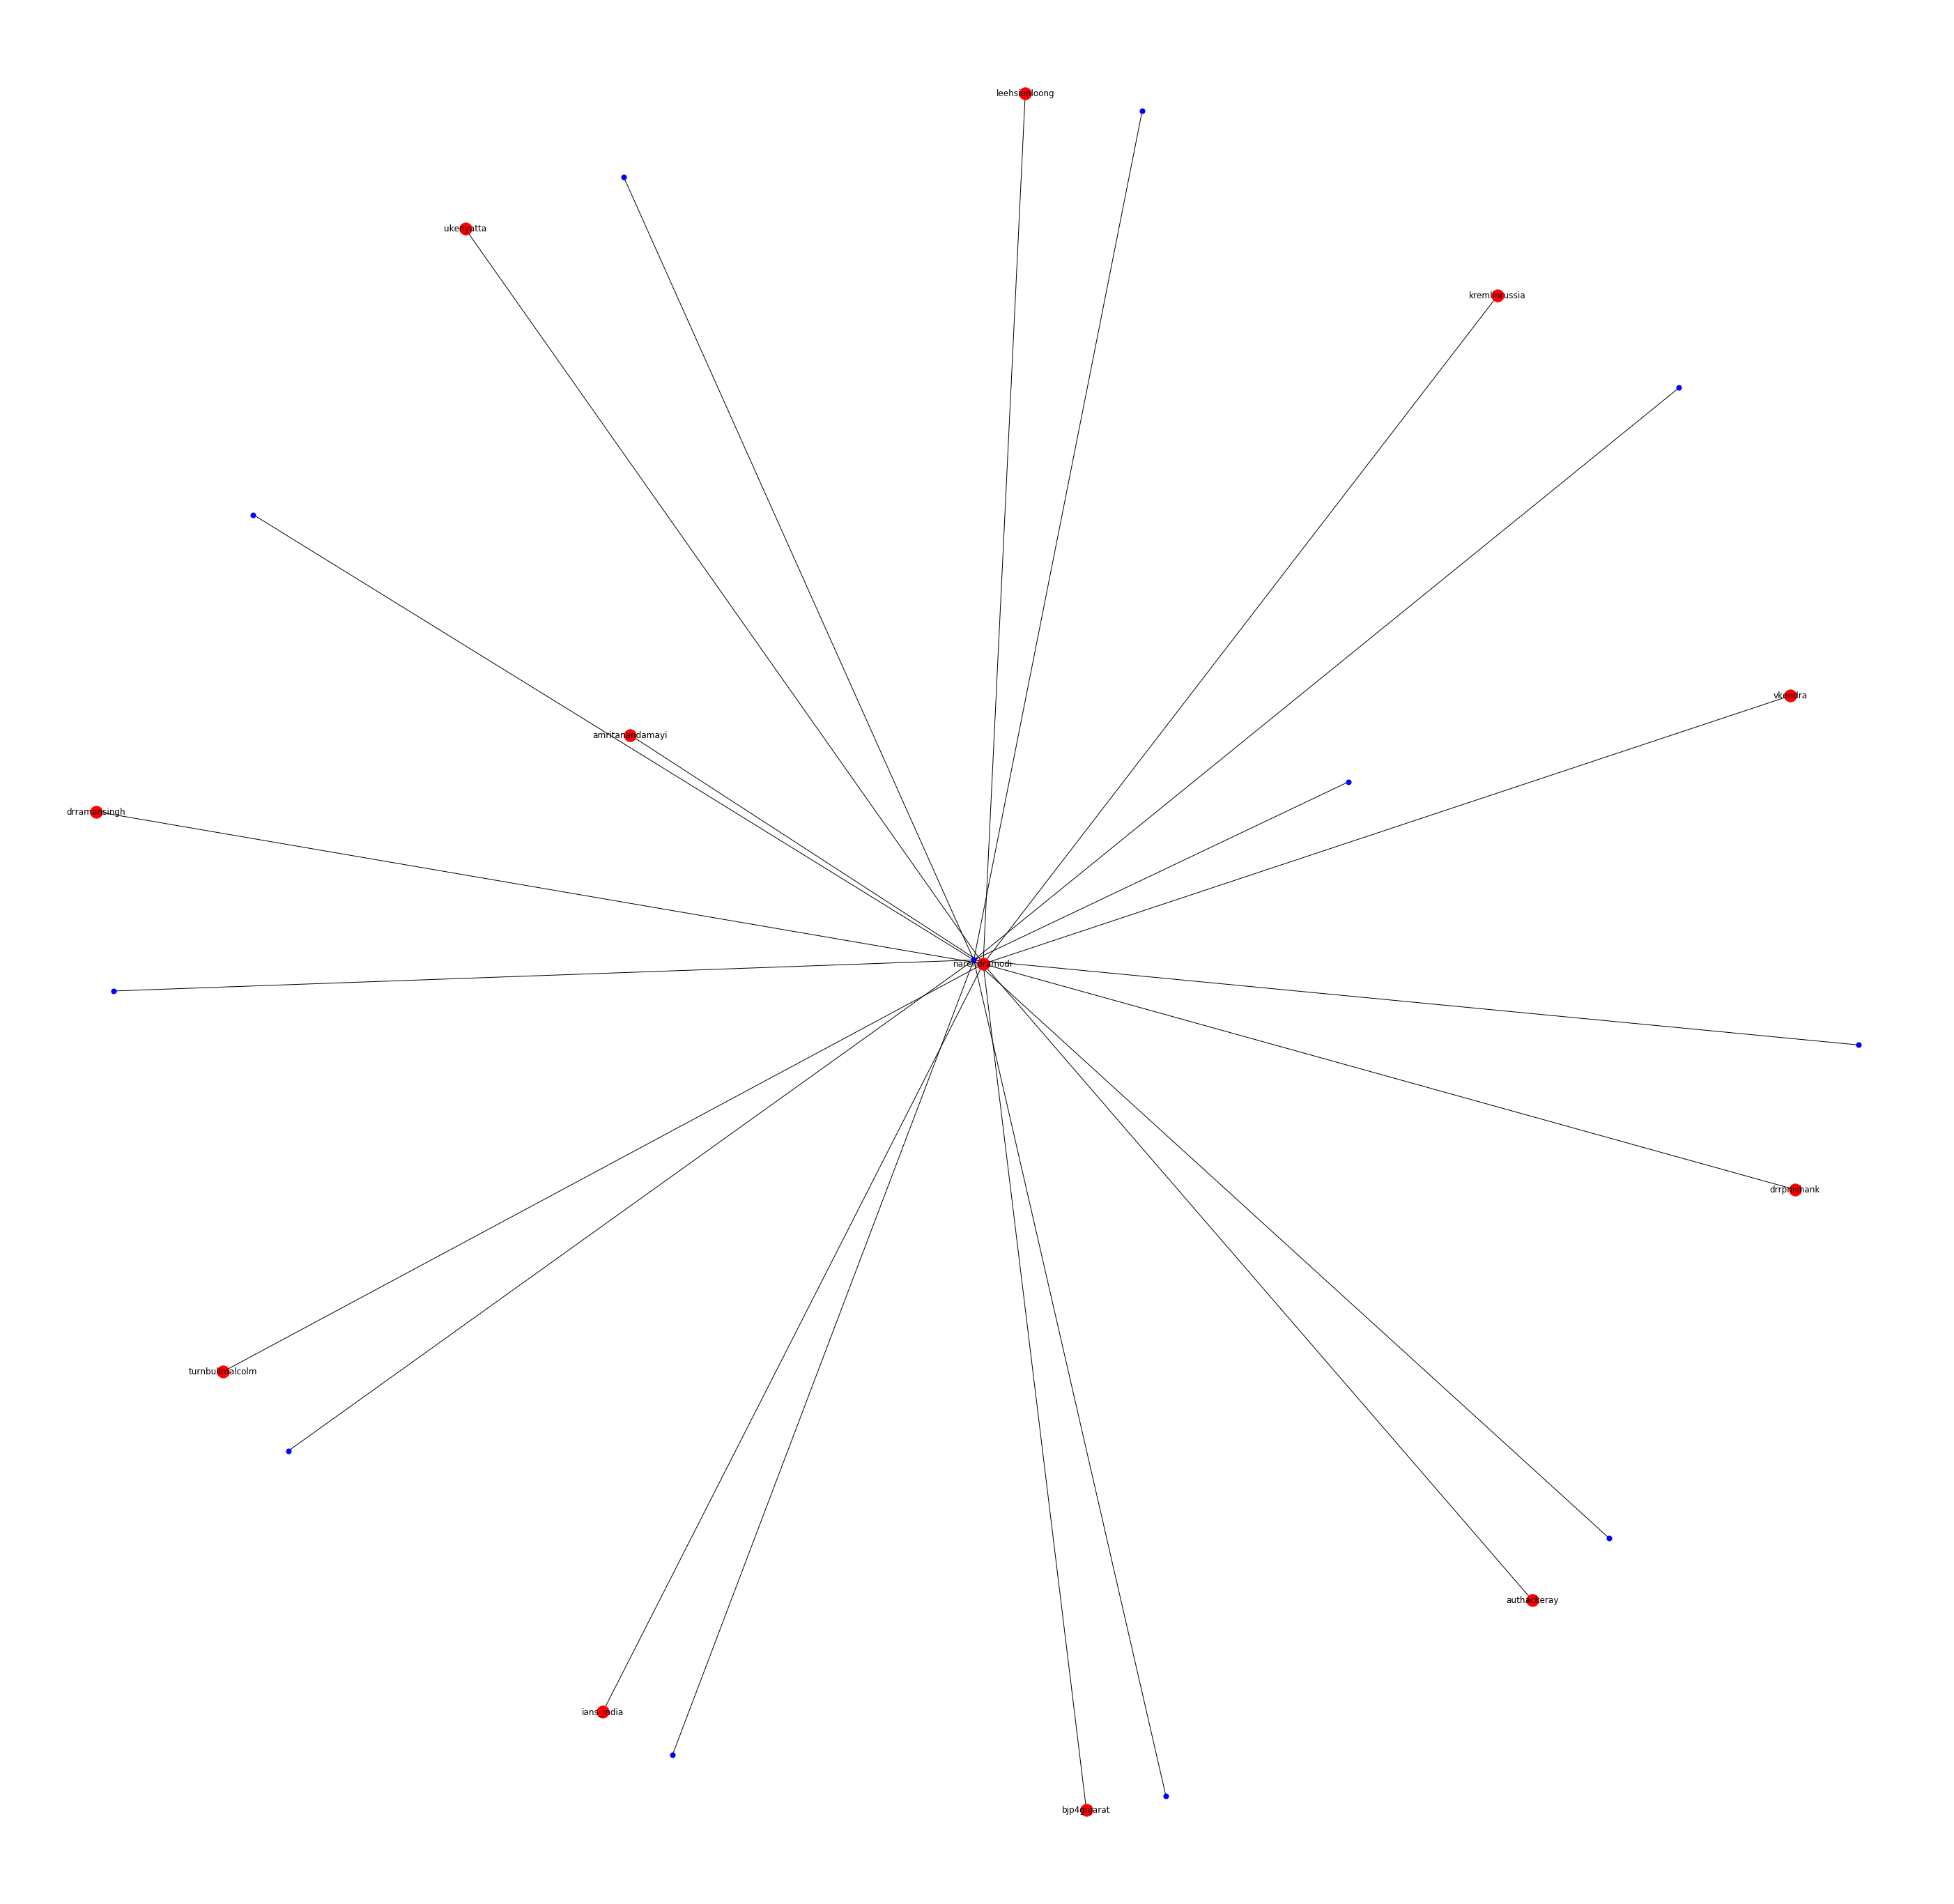

In [23]:
# s='narendramodi'
# #u = unicode(s, "utf-8")
# hub_ego=nx.ego_graph(make_graph("modi_education.csv"),s)
# # Draw graph
# pos=nx.spring_layout(hub_ego)
# nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# # Draw ego as large and red
# #nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
# #plt.savefig('Medici.png')
# plt.show()